# Hist 3368 - Week 9 - Named Entity Recognition

#### by Jo Guldi, borrowed largely from https://www.geeksforgeeks.org/python-named-entity-recognition-ner-using-spacy/

In this notebook, we'll learn how to use the powerful SPACY software library to search for "named entities." 

A ***named entity*** can be a person's name, the name of a country, the date of a famous event, a kind of money, a corporation, or practically anything else. 

 * In the case of this notebook, we'll learn about some of the results of named entity recognition.  We'll see how SPACY categorized named entities as people, places, dates, etc.  

 * We'll then apply SPACY to the Dallas City Council minutes, where we'll see that named entity recognition is capable of detecting the names of local government regulations in Texas
 
 We will notice that the results of grammatical analysis look *very* different from the results of using WordNet.  The controlled vocabulary organized by linguists at Princeton, for example, doesn't know anything about local government regulations in Dallas, Texas.  But by using grammatical analysis, Spacy will pick up on the names of common government regulations specific to Dallas.

#### Using Code to Extract Named Entities

We'll learn about the *Spacy* software package.  To work with Spacy, you need to tell M2 to begin a session with special parameters that include loading the background software for Spacy.

* Please note that to use spaCy on M2 you must go to My Interactive Sessions/JupyterLab and add **source** /hpc/applications/python_environments/spacy/bin/activate to the “Custom environment settings” field.

We'll learn about the

    nlp(string)
    
command from Spacy, which tells spacy to extract all named entities from a string of text.   

We'll also learn how to read the output of the nlp() command, which creates a dataset whose contents are typically called with a for loop requesting each of the following:

    *.ents -- that is, each of the entities for the document created
    *.ent_label_ -- for each entity, there is an ent_label that includes information about what kind of named entity Spacy has found.  

#### Counting Named Entities and Thinking About Counting

We will also see some familiar commands for grouping and counting, which will allow us to model the number of events, persons, corporations, and nationalities mentioned over time with NER.

	.explode().dropna()
	.value_counts()
	.nlargest()
	.groupby()
	.count()
	.unique()

We’ll also talk about the best way of counting over time.  Consider the following propositions.  

If I want to understand the most important places discussed over time in the Dallas City Council debates, should I pay most attention to:

1. the neighborhoods referenced the highest number of months?
2. the neighborhoods that are referenced with the maximum number of times in any single month?
3. the neighborhoods that are referenced the most frequently overall? 

We will give you the code for each of these measurements.

In theory, each of these measurements might contribute to some analysis — the question is how each of them produces a different model of “significance.” 

For instance, the first measure — (1) neighborhoods referenced over the most months — will give you a list of neighborhoods referenced consistently, whereas the second measure — (2) the highest relative peak — will give you neighborhoods that became suddenly important at one moment of time.  Both measures might be potentially useful to know about.  

We will  be asking you to think about how changing what is being measured changes the meaning of the analysis. 

#### Learn How to Write a Function

We'll learn how to define a function, using the command

    def 

and how to return information from a function with the command

    return()

We’ll define a function called ***ner_finder(sentence, Label1)*** -- which will return all the named entities of kind label1 from a string called sentence.  

In theory, ner_finder() can be applied to the text column of any dataset and produce answers, although it is very slow, as is the way with grammatical analysis. The simple formula for applying ner_finder to a column of text, looking only for the items labeled 'LAW', is this:

    results = [ner_finder(sentence, 'LAW') for sentence in dallas_minutes['Text']]

#### Learn Some More About Speed

Finally, this lesson adds a few tools that are useful for speeding up slow code and for estimating how long a coding process will take. These tools, while not essential to the work of this notebook, may be useful as you try to implement code on large-scale datasets.

We’ll learn about speeding up code using “parallel” processing, which is often faster for large datasets than list comprehension.  We’ll learn the function

	.apply()

which "applies" a task over over each item in a list or column -- much like a for-loop. 

To use .apply() with the function ner_finder(), we’ll use the grammar

	.apply(lambda x: [function to be applied])

to apply a function like ner_finder() to each item in a pandas column.



Technically, you don't need to understand .apply() to work with NER.  We'll learn that these two lines of code do *exactly the same thing,* although one may be faster:

    [ner_finder(sentence, 'LAW') for sentence in dallas_minutes['Text']] -- this is the 'list comprehension' method explained above
	dallas_minutes['Text'].apply(lambda x: ner_finder(x, 'LAW')) -- this is the .apply() method 


We’ll learn a little about timing data processes with the **time** package.  We’ll use the command

	time.time() 

To take the time in milliseconds. We'll use this timer to compare the speed of different approaches to the same code. 

This tool will allow you to decide, for yourself, between two comparable coding approaches, choosing the one that is more efficient.





#### Setup Spacy

In [240]:
import pandas as pd, spacy
from datetime import datetime

In [241]:
nlp = spacy.load('en_core_web_sm')

## Named Entity Recognition with Spacy

The package SPACY uses the grammar of sentences to make an educated "guess" about what kind of entity is under consideration. 

Note that the package *isn't* applying a controlled vocabulary of all possible dates or years. It's just looking at grammar -- using clues like the part-of-speech of each of the words and what prepositions are nearby to make a guess about whether each entity is the name of a law, a place, or a person.

It's actually *generating* a new controlled vocabulary on the basis of grammar.

Named entity recognition can be used as an alternative to controlled vocabulary to create a much more specific, tailor-made vocabulary appropriate to a textbase.  


In [242]:
sentence = "The United Kingdom passed the Representation of the People Act in 1928, giving women in Wales and London, among others, the right to vote."
  
doc = nlp(sentence)
  
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

The United Kingdom 0 18 GPE
the People Act 48 62 LAW
1928 66 70 DATE
Wales 88 93 GPE
London 98 104 GPE


Notice that the program has correctly identified a "geo political entity," or GPE, in "The United Kingdom."  It has correctly guessed that we're talking about a law, although it guesses that the name of the law is "the People Act" rather than "The Representation of the People Act."  It notes that the correct year is important, 1928.  

It's important for you to notice that *some of the information is correct* and *some of the information is rather bad*.  As always, you'll need to apply your own best judgment to the situation.

Other things you might be curious about:

 * In the program in question, we're parsing through a list of information called *.ents*, which spacy creates when applying the command **nlp()** to a document. Our document is called called *doc*, so the entities list is called *.ents*.  

 * .ents contains information coded by Spacy as the ".text," or the word that appears to have a significance, the starting character number, the ending character number, and a .label_, which corresponds to a grammatical category such as "date," "law," "geo-political entity," etc.

 * Note: This information is hidden in Spacy's own "Doc" data type.  You don't really need to know anything for our purposes beyond how to call information from a Spacy doc by asking for ent.label_ etc.

Let's try a more complicated sentence. This one mentions nations and people as well as languages.

In [243]:
sentence2 = "In 1066, the Norman leader William the Conquerer -- who came from the north of France -- invaded England at the Battle of Hastings, and his success is the reason why the English language has so many French words in it."
  
doc = nlp(sentence2)
  
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

1066 3 7 DATE
Norman 13 19 NORP
William the Conquerer 27 48 PERSON
France 79 85 GPE
England 97 104 GPE
the Battle of Hastings 108 130 EVENT
English 170 177 LANGUAGE
French 199 205 NORP


Notice that this time we have many more named entities.  Some are classified "DATE" -- like 1066. Others are classified "EVENT" -- like the Battle of Hastings.  We also have a person, William the Conquerer, a LANGUAGE -- English, two nationalities or regional identifications for people (NORP), and two geo-political lentities (French, English).

One could imagine creating a digital history project that investigated any of these categories. For instance, if we were interested in how Congress handled immigration over the twentieth century, it might be interesting to count references to different nationalities and languages.  If we were interested in how Reddit talked about climate change, it might be interesting to track the people and place-names that came up in discussions of environmental contamination.  

However, in this assignment we're going to ask how parliament talked about events and dates.

In [244]:
justevents = []

for ent in doc.ents:
    if ent.label_ == 'EVENT':
        justevents.append(ent.text)
        
justevents

['the Battle of Hastings']

### Load some data

We're going to load the Dallas City Council minutes.

In [661]:
council_dir = '/scratch/group/history/hist_3368-jguldi/city_council'

dallas_minutes = pd.read_csv(f'{council_dir}/dallas.csv', sep='|', index_col='index') # read in the Dallas City Council minutes
dallas_minutes['Text'] = dallas_minutes['Text'].str.replace(r'(?:_|[^\w\s])+', '') # remove special characters and whitespace -- we aren't lowercasing becausethe upper cases help with named entity recogniztion.
dallas_minutes['Date'] = pd.to_datetime(dallas_minutes['Date'], format='%Y-%m-%d') # cast the data column to datetime objects 
dallas_minutes['Year'] = [date.year for date in dallas_minutes['Date']]
dallas_minutes['Month-Year'] = [str(date.month) + "-" + str(date.year) for date in dallas_minutes['Date']]

dallas_minutes[:5]

Filename       Date  \
index                         
0      010219Min 2019-01-02   
1      010318Min 2018-01-03   
2      010417Min 2017-01-04   
3      010616Min 2016-01-06   
4      010814Min 2014-01-08   

                                                    Text  Year Month-Year  
index                                                                      
0      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019  
1      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2018     1-2018  
2        OFFICE OF THE CITY SECRETARY      CITY OF DA...  2017     1-2017  
3      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2016     1-2016  
4      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2014     1-2014

Let's apply our event recognizer to just a sample.

In [662]:
dallas_minutes_year1 = dallas_minutes[dallas_minutes['Year'] == 2019]
dallas_minutes_year1[:5]

Filename       Date  \
index                         
0      010219Min 2019-01-02   
7      010919Min 2019-01-09   
26     012319Min 2019-01-23   
37     020619Min 2019-02-06   
46     021319Min 2019-02-13   

                                                    Text  Year Month-Year  
index                                                                      
0      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019  
7      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019  
26     OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019  
37     OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     2-2019  
46     OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     2-2019

In [663]:
dallas_minutes_year1['Text'][0]

'OFFICE OF THE CITY SECRETARY      CITY OF DALLAS TEXAS  MINUTES OF THE DALLAS CITY COUNCIL  WEDNESDAY JANUARY 2 2019    190060    CITY COUNCIL BRIEFING  CITY HALL ROOM 6ES  MAYOR MICHAEL RAWLINGS PRESIDING    PRESENT  14  Rawlings Thomas Medrano Griggs 924 am Arnold Narvaez Felder  Atkins 916 am Clayton McGough Kleinman Greyson 917 am  Gates Kingston 945 am    ABSENT  1   Callahan    The meeting was called to order at 912 am with a quorum of the city council present    The invocation was given by Andrew Paley Senior Rabbi of Temple Shalom    Councilmember Arnold led the pledge of allegiance    The meeting agenda posted in accordance with Chapter 551 OPEN MEETINGS of the Texas  Government Code was presented    After all business properly brought before the city council had been considered the city council  adjourned at 1238 pm                                Mayor   ATTEST          City Secretary         Date Approved    The annotated agenda is attached to the minutes of this meeting as

Let's do a spacy parse just on the one minute.

In [664]:
doc = nlp(dallas_minutes_year1['Text'][0])
  
for ent in doc.ents[:30]:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

DALLAS 42 48 GPE
THE DALLAS CITY COUNCIL 67 90 ORG
JANUARY 2 2019    190060 102 126 DATE
14 218 220 CARDINAL
Thomas Medrano Griggs 231 252 PERSON
924 253 256 CARDINAL
Arnold Narvaez 260 274 PERSON
Atkins 283 289 PERSON
Clayton McGough 297 312 PERSON
Callahan 375 383 PERSON
912 am 422 428 QUANTITY
Andrew Paley Senior Rabbi 502 527 PERSON
Councilmember Arnold 548 568 PERSON
Chapter 551 646 657 LAW
Texas 679 684 GPE
1238 830 834 DATE
the minutes 969 980 TIME
the city council 1060 1076 ORG
the minutes 1093 1104 TIME
DALLAS 1470 1476 GPE
THE DALLAS CITY COUNCIL 1495 1518 ORG
WEDNESDAY 1520 1529 DATE
JANUARY 2 2019 1530 1544 DATE
DALLAS 1699 1705 GPE
THE DALLAS CITY COUNCIL 1724 1747 ORG
WEDNESDAY 1749 1758 DATE
JANUARY 2 2019 1759 1773 DATE
DALLAS 1926 1932 GPE
JANUARY 2 2019    190061 1986 2010 DATE
the city council 2084 2100 ORG


Let's look for just the dates referenced.

In [665]:
foundlaws = []

for ent in doc.ents:
    if ent.label_ == 'LAW':
        foundlaws.append(ent.text)
        
foundlaws

['Chapter 551']

In [666]:
foundpeople = []

for ent in doc.ents:
    if ent.label_ == 'PERSON':
        foundpeople.append(ent.text)
foundpeople

['Thomas Medrano Griggs',
 'Arnold Narvaez',
 'Atkins',
 'Clayton McGough',
 'Callahan',
 'Andrew Paley Senior Rabbi',
 'Councilmember Arnold',
 'SPEAKERS',
 'Sarah Lamb',
 'Gaston Ave',
 'Larry Johnson',
 'Carolyn King Arnold',
 'Pro Tem Medrano',
 'List',
 'Clara Lee BrownTrimble',
 'Martin Luther King',
 'Councilmember Atkins',
 'Callahan']

In [667]:
foundevents = []

for ent in doc.ents:
    if ent.label_ == 'EVENT':
        foundevents.append(ent.text)
        
foundevents

[]

Let's write a new function.  Functions are defined using the command

    def FUNCTIONNAME(object1, object2):
    
We'll call our new function ner_finder.

It will take two commands: sentence, and label1.

It will return any matches for a sentence and a label. To tell Python what to return to the user after running a function, we use 

    return()
    

In [668]:
def ner_finder(sentence, label1):
    
    doc = nlp(sentence)
    
    foundstuff = []

    for ent in doc.ents:
        if ent.label_ ==  label1:
            foundstuff.append(ent.text)
    
    return(foundstuff)

Let's try out our new function on some of the categories that Spacy can detect:

In [669]:
ner_finder(dallas_minutes_year1['Text'][0], 'GPE')

['DALLAS',
 'Texas',
 'DALLAS',
 'DALLAS',
 'DALLAS',
 'DALLAS',
 'DALLAS',
 'DALLAS',
 'DALLAS',
 'DALLAS',
 'DALLAS',
 'DALLAS']

In [670]:
ner_finder(dallas_minutes_year1['Text'][0], 'LAW')

['Chapter 551']

In [671]:
ner_finder(dallas_minutes_year1['Text'][0], 'PERSON')

['Thomas Medrano Griggs',
 'Arnold Narvaez',
 'Atkins',
 'Clayton McGough',
 'Callahan',
 'Andrew Paley Senior Rabbi',
 'Councilmember Arnold',
 'SPEAKERS',
 'Sarah Lamb',
 'Gaston Ave',
 'Larry Johnson',
 'Carolyn King Arnold',
 'Pro Tem Medrano',
 'List',
 'Clara Lee BrownTrimble',
 'Martin Luther King',
 'Councilmember Atkins',
 'Callahan']

In [672]:
ner_finder(dallas_minutes_year1['Text'][0], 'LOC')

['Southern Hills']

In [673]:
ner_finder(dallas_minutes_year1['Text'][0], 'DATE')

['JANUARY 2 2019    190060',
 '1238',
 'WEDNESDAY',
 'JANUARY 2 2019',
 'WEDNESDAY',
 'JANUARY 2 2019',
 'JANUARY 2 2019    190061',
 'JANUARY 2 2019    190062',
 'JANUARY 2 2019    190063',
 '1  Approval of Minutes',
 'December 5',
 'December 19 2018',
 'December 19 2018',
 'JANUARY 2 2019    190064',
 '195100',
 '195101',
 'JANUARY 2 2019    190065',
 'JANUARY 2 2019    190066',
 'JANUARY 2 2019',
 '190067',
 'WEDNESDAY',
 'JANUARY 2 2019']

In [674]:
ner_finder(dallas_minutes_year1['Text'][0], 'ORG')

['THE DALLAS CITY COUNCIL',
 'the city council',
 'THE DALLAS CITY COUNCIL',
 'THE DALLAS CITY COUNCIL',
 'the city council',
 'the City Council Rules of Procedure the city council',
 'City Council Meeting',
 'Special Called',
 'City Council Meeting',
 'Councilmember Narvaez',
 'Kingston',
 'Callahan absent         OFFICE',
 'Item 2',
 'Councilmember McGough',
 'the Citizen Homelessness Commission',
 'Kingston',
 'MLK',
 'B  ',
 'the city council',
 'THE DALLAS CITY COUNCIL']

In [675]:
ner_finder(dallas_minutes_year1['Text'][0], 'EVENT')

[]

## Named Entity Recognition with Tabular Data

Now let's apply the spacy *nlp* command to everything in the 'Text' column. The formula that we used above was 

    nlp(sentence)

This time, however, we want to apply *nlp()* to every row in a pandas dataframe.   Here's one way of writing such a command:

    dallas_minutes['NLP'] = [ner_finder(sentence, 'LAW') for sentence in dallas_minutes['Text']]

In [676]:
sample = [ner_finder(sentence, 'LAW') for sentence in dallas_minutes['Text'][:5]]
sample

[['Chapter 551'],
 ['Chapter 551', 'Chapter 551'],
 ['Chapter 551', 'the City Plan and Zoning Commission', 'Chapter 551'],
 ['Chapter 551',
  'the Texas Government Code',
  'the City Plan and Zoning Commission',
  'Chapter 551',
  'the Good Faith Effort Program  Security Personnel and Devices Sec 551076 TOMA'],
 ['Chapter 551',
  'the Texas Government Code',
  'Resolution No 131106',
  'Section 713 of the City Council Rules of Procedure Motions',
  'Section 713 of the City Council Rules of Procedure Motions',
  'Section 713 of the City Council Rules of Procedure Motions',
  'Section 713 of the City Council Rules of Procedure Motions',
  'Section 64',
  'Chapter 551',
  'Section 713 of the City Council Rules of Procedure Motions',
  'Section 713 of the City Council Rules of Procedure Motions',
  'Section 713 of the City Council Rules of Procedure Motions']]

Notice that the code hung for a moment, even though we limited the sample to the first five reports of the city council minutes using [:5


  * Spacy is an intensive software package, and applying nlp() to many documents can be slow going. Remember how a similarly linguistically-intense command, wn.morphy(), slowed us down elsewhere.


#### Test how slow your code is on a tiny segment of data


Many coders like to keep track of how fast different approaches are so that they can choose the speediest approach when they move from small data to big data. Let's do that.  We'll import the *time* module and call

    time.time() 
    
to get the time in milliseconds.  Then we run the same line of code, and call time.time() again afterwards, and subtract start time from finish.

We can use datetime.time() to take the time before and after the operation to see how quick or slow each operation is.

Here's the same code you just ran again, with timing instructions around it.

In [677]:
import time
start = time.time()

sample = [ner_finder(sentence, 'LAW') for sentence in dallas_minutes['Text'][:5]]

finish = time.time()

print(sample)
print()

finish-start

[['Chapter 551'], ['Chapter 551', 'Chapter 551'], ['Chapter 551', 'the City Plan and Zoning Commission', 'Chapter 551'], ['Chapter 551', 'the Texas Government Code', 'the City Plan and Zoning Commission', 'Chapter 551', 'the Good Faith Effort Program  Security Personnel and Devices Sec 551076 TOMA'], ['Chapter 551', 'the Texas Government Code', 'Resolution No 131106', 'Section 713 of the City Council Rules of Procedure Motions', 'Section 713 of the City Council Rules of Procedure Motions', 'Section 713 of the City Council Rules of Procedure Motions', 'Section 713 of the City Council Rules of Procedure Motions', 'Section 64', 'Chapter 551', 'Section 713 of the City Council Rules of Procedure Motions', 'Section 713 of the City Council Rules of Procedure Motions', 'Section 713 of the City Council Rules of Procedure Motions']]



1.3206443786621094

Next, let's try a speedier approach.  Let's use our parallelized ner_finder to search for mentions of laws in just one year. 

Again, we'll run the sample code on a tiny sample.  Again, we'll keep track of how long it takes.  


#### Speeding things up with .apply()

To speed things up, we can try calling upon "parallel" processing, which causes every node within a computer system to run the same command simultaneously.  

We'll use a 'lambda' function, which allows us to take the function following "lambda x" and efficiently "apply" it to every row in the dataframe. Lambda functions run in parallel.

Note these two elements of the grammar.

    .apply()
    lambda x: [function to be applied]


Here's a tutorial about using .apply().

In [8]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/smPLY_5gVv4" title="YouTube video player""></iframe>')




And here's some code using .apply() with ner_finder() to search for all the laws mentioned in the Dallas Minutes.

Note that we are also using *time.time()* to take the time in milliseconds before and after running the function, so that we can compare how fast the .apply() method is to similar code using list comprehension above.

**This may still take a minute.** But apply is potentially much, much faster than if you had run the same command wihtout parallel processing.  

*Note: You will see a pink warning label. It isn't an error, and the data is still running.*

In [678]:
start = time.time()

sample2 = dallas_minutes['Text'][:5].apply(lambda x: ner_finder(x, 'LAW'))

finish = time.time()

print(sample2)
print()

finish-start

index
0                                        [Chapter 551]
1                           [Chapter 551, Chapter 551]
2    [Chapter 551, the City Plan and Zoning Commiss...
3    [Chapter 551, the Texas Government Code, the C...
4    [Chapter 551, the Texas Government Code, Resol...
Name: Text, dtype: object



1.3108439445495605

The winner is... the .apply() method in parallel -- faster by a hair! (*NOTE: Your mileage may vary*)

Let's run it on a slightly larger sample of text -- the whole year 2019.  

***We chose the faster method on purpose, but NER is a slow process. This process clocks at 30 m on my session. Get a cup of tea.***

In [679]:
start = time.time()


dallas_minutes_year1['Laws'] = dallas_minutes_year1['Text'].apply(lambda x: ner_finder(x, 'LAW'))

finish = time.time()
print(finish-start)


dallas_minutes_year1[:5]

28.58041501045227


Filename       Date  \
index                         
0      010219Min 2019-01-02   
7      010919Min 2019-01-09   
26     012319Min 2019-01-23   
37     020619Min 2019-02-06   
46     021319Min 2019-02-13   

                                                    Text  Year Month-Year  \
index                                                                       
0      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   
7      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   
26     OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   
37     OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     2-2019   
46     OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     2-2019   

                                                    Laws  
index                                                     
0                                          [Chapter 551]  
7      [Chapter 551, the Funding Agreement, the City ...  
26     [Chapter 551, Section 411, Section 411, Sectio...  
37     [Chapter 551, Chapter 551, the City Plan and Z...  
46     [Chapter 551, Ramirez 6718, Chapter 2520415 of...

In [680]:
# Here's the code for applying nlp to the entire archive of Dallas City Council minutes, not just one year.  
#dallas_minutes['Laws'] = dallas_minutes['Text'].apply(lambda x: ner_finder(x, 'LAW'))
#dallas_minutes                                                                  

Next, let's filter for JUST the NLP findings that are events.

### Find the most frequently mentioned laws.

Notice that the laws listed in the 'Laws' column of *dallas_minutes_year1* are organized as a *list* -- they're inside square brackets, seaprated by commas. 

In order to count items in a list, we *explode* the list so that each list item gets its own row.  

Then we can use *.value_counts()* to count how many times each appears.

We can use *.nlargest()* to get the most frequent items.

Let's use 'explode,' 'groupby,' and 'count' to find out how many events were referenced per year.

In [681]:
list = dallas_minutes_year1['Laws'].explode().dropna() 
list

index
0                                      Chapter 551
7                                      Chapter 551
7                            the Funding Agreement
7                  the City Charter and Chapter 18
7                                  Section 51A4510
                          ...                     
321            the City Plan and Zoning Commission
321    the Collin Central Appraisal District Board
321                                        Chapter
321                                        Chapter
321                                     Section 64
Name: Laws, Length: 389, dtype: object

In [682]:
top_twenty_laws = pd.Series(list).value_counts().nlargest(20)
top_twenty_laws

Chapter 551                                       66
Section 411                                       55
the City Plan and Zoning Commission               12
Substantial Amendment                             10
Chapter 372 of the Texas Local Government Code     9
Chapter                                            7
Chapter 380                                        5
Chapter 31                                         5
the Texas Local Government Code                    4
Assessment                                         4
Chapter 372 of                                     4
the City Charter and Chapter 18                    4
Action  Plan                                       3
Section 63                                         3
Chapter 17 Food Establishments                     3
the Texas Government Code                          3
Section 63a                                        3
Section                                            3
the City Council Rules of Procedure           

### Use Groupby() to Count Laws Mentioned by Month

We can use *.explode()* and *.groupby()* to tell pandas how to organize the data before using *.count()* to tell us how many laws are mentioned in each grouping.

  * Let's "explode" the data so that every law gets its own row. 
  * Let's group by *Month-Year* and *Laws* so that we bundle under each month-year each mention of a law mentioned in that time period.  
  * We'll use square brackets around 'Laws' once more to tell pandas that we're interested in just working with the *Laws* column. 
  * We'll apply *.count()* to count ***how many laws are mentioned per Month-Year.*** This is what we really want to know.

First, 'explode' the data.

In [683]:
dallas_minutes_year1 = dallas_minutes_year1.explode('Laws').dropna()
dallas_minutes_year1[:5]

Filename       Date  \
index                         
0      010219Min 2019-01-02   
7      010919Min 2019-01-09   
7      010919Min 2019-01-09   
7      010919Min 2019-01-09   
7      010919Min 2019-01-09   

                                                    Text  Year Month-Year  \
index                                                                       
0      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   
7      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   
7      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   
7      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   
7      OFFICE OF THE CITY SECRETARY      CITY OF DALL...  2019     1-2019   

                                  Laws  
index                                   
0                          Chapter 551  
7                          Chapter 551  
7                the Funding Agreement  
7      the City Charter and Chapter 18  
7                      Section 51A4510

Next, groupby() 'month-year' and 'law', counting how frequently each law shows up for each unit of time.

In [684]:
laws_per_month = dallas_minutes_year1.groupby(['Month-Year', 'Laws'])['Laws'].count()
laws_per_month[:15]

Month-Year  Laws                                     
1-2019      Abatement                                     1
            Aviation Fund 4496809 Equipment               1
            Chapter 26                                    1
            Chapter 31                                    1
            Chapter 51A                                   1
            Chapter 551                                   3
            Section 411                                  19
            Section 51A 710072                            1
            Section 51A4510                               1
            Section 51A710071                             1
            Section 51A8403 of  Chapter                   1
            Section 63a                                   1
            Subdistrict 3                                 1
            a Local Project Advance Funding Agreement     1
            the City Charter and Chapter 18               1
Name: Laws, dtype: int64

Some minor reformatting can turn the resulting Series object into a DataFrame object with properly labeled columns.

In [685]:
laws_per_month = pd.DataFrame(laws_per_month) # convert from Series to DataFrame
laws_per_month.columns = ['Count'] # label the one column "count"
laws_per_month = laws_per_month.reset_index() # turn the multi-index into columns 'year' and 'vocab'
laws_per_month[:5]

Month-Year                             Laws  Count
0     1-2019                      Abatement        1
1     1-2019  Aviation Fund 4496809 Equipment      1
2     1-2019                       Chapter 26      1
3     1-2019                       Chapter 31      1
4     1-2019                      Chapter 51A      1

#### In how many unique months was each law referenced?

Because we're interested in laws that are talked about over time, it might be useful to know in how many different months each law appears.

We can also find out in how many months each law was referenced.

  * Let's group by 'Laws' so that we treat each instance of mentioning a law as a grouping.
  * After grouping by 'Laws', let's just look at the column 'Month-Year'.
  * We want to count how many unique month-year combinations there are for each Law.  So let's use *.unique()*.
  * We want to count the number of unique month-year combinations. So then we'll *.count()*
  


In [686]:
number_of_months_referenced = laws_per_month.groupby(['Laws'])['Month-Year'].unique()
number_of_months_referenced 

Laws
2017049838001 Amendment                                    [8-2019]
Abatement                                                  [1-2019]
Act                                                       [12-2019]
Action  Plan                              [12-2019, 4-2019, 8-2019]
Americas Water   Infrastructure Act                        [6-2019]
                                                    ...            
the Site Selection Evaluation Criteria                     [6-2019]
the Texas Government Code                  [2-2019, 6-2019, 8-2019]
the Texas Local Government Code                            [9-2019]
the Texas Occupations Code                                [10-2019]
the Victims of Crime Act                                   [8-2019]
Name: Month-Year, Length: 181, dtype: object

#### Find the laws referenced over the highest number of unique months

It would be useful to know which laws were talked about over more than 3 months. 


We will use *.str.len()* to ask Python for the *lengths* of each list of months is (len(monthlist)).

In [687]:
number_of_months_referenced = pd.DataFrame(number_of_months_referenced)
number_of_months_referenced['unique_months'] = number_of_months_referenced['Month-Year'].str.len()
number_of_months_referenced

Month-Year  \
Laws                                                                
2017049838001 Amendment                                  [8-2019]   
Abatement                                                [1-2019]   
Act                                                     [12-2019]   
Action  Plan                            [12-2019, 4-2019, 8-2019]   
Americas Water   Infrastructure Act                      [6-2019]   
...                                                           ...   
the Site Selection Evaluation Criteria                   [6-2019]   
the Texas Government Code                [2-2019, 6-2019, 8-2019]   
the Texas Local Government Code                          [9-2019]   
the Texas Occupations Code                              [10-2019]   
the Victims of Crime Act                                 [8-2019]   

                                        unique_months  
Laws                                                   
2017049838001 Amendment                             1  
Abatement                                           1  
Act                                                 1  
Action  Plan                                        3  
Americas Water   Infrastructure Act                 1  
...                                               ...  
the Site Selection Evaluation Criteria              1  
the Texas Government Code                           3  
the Texas Local Government Code                     1  
the Texas Occupations Code                          1  
the Victims of Crime Act                            1  

[181 rows x 2 columns]

We'll ask in the code below for just those laws where the number of unique_months is greater or equal than 3.  

In [688]:
frequently_referenced = number_of_months_referenced[number_of_months_referenced['unique_months']>=3].reset_index()
frequently_referenced

Laws  \
0                         Action  Plan   
1                              Chapter   
2                           Chapter 31   
3                          Chapter 551   
4                              Section   
5                          Section 411   
6                Substantial Amendment   
7  the City Plan and Zoning Commission   
8            the Texas Government Code   

                                          Month-Year  unique_months  
0                          [12-2019, 4-2019, 8-2019]              3  
1                 [11-2019, 12-2019, 6-2019, 8-2019]              4  
2                          [1-2019, 10-2019, 2-2019]              3  
3  [1-2019, 10-2019, 11-2019, 12-2019, 2-2019, 3-...             11  
4                           [3-2019, 4-2019, 6-2019]              3  
5                           [1-2019, 4-2019, 6-2019]              3  
6         [10-2019, 12-2019, 4-2019, 6-2019, 8-2019]              5  
7  [10-2019, 11-2019, 12-2019, 2-2019, 3-2019, 4-...              8  
8                           [2-2019, 6-2019, 8-2019]              3

This is great. But to graph the data, we need one month-year per row.  

There are multiple ways of going about the next step, but we'll show one.  Let's connect this data about the most talked-about laws to our data about dates, in the dataframe laws_per_month.

Notice the use of .index, .isin(), and [] to filter for a certain condition.

In [689]:
top_laws_per_month = laws_per_month[laws_per_month['Laws'].isin(frequently_referenced['Laws'])]
top_laws_per_month[:10]

Month-Year                                 Laws  Count
3      1-2019                           Chapter 31      1
5      1-2019                          Chapter 551      3
6      1-2019                          Section 411     19
18    10-2019                           Chapter 31      2
21    10-2019                          Chapter 551      9
31    10-2019                Substantial Amendment      2
34    10-2019  the City Plan and Zoning Commission      1
36    11-2019                              Chapter      1
42    11-2019                          Chapter 551      5
60    11-2019  the City Plan and Zoning Commission      2

Let's do some minor reformatting of the Month-Year from string into datetime() data so that the graph will display correctly.

In [690]:
top_laws_per_month['Month-Year'] = pd.to_datetime(top_laws_per_month['Month-Year'], format='%m-%Y', errors='coerce')
top_laws_per_month[:5]

Month-Year         Laws  Count
3  2019-01-01   Chapter 31      1
5  2019-01-01  Chapter 551      3
6  2019-01-01  Section 411     19
18 2019-10-01   Chapter 31      2
21 2019-10-01  Chapter 551      9

#### Plotting a Graph of Named Entities Over Time

<Figure size 432x288 with 0 Axes>

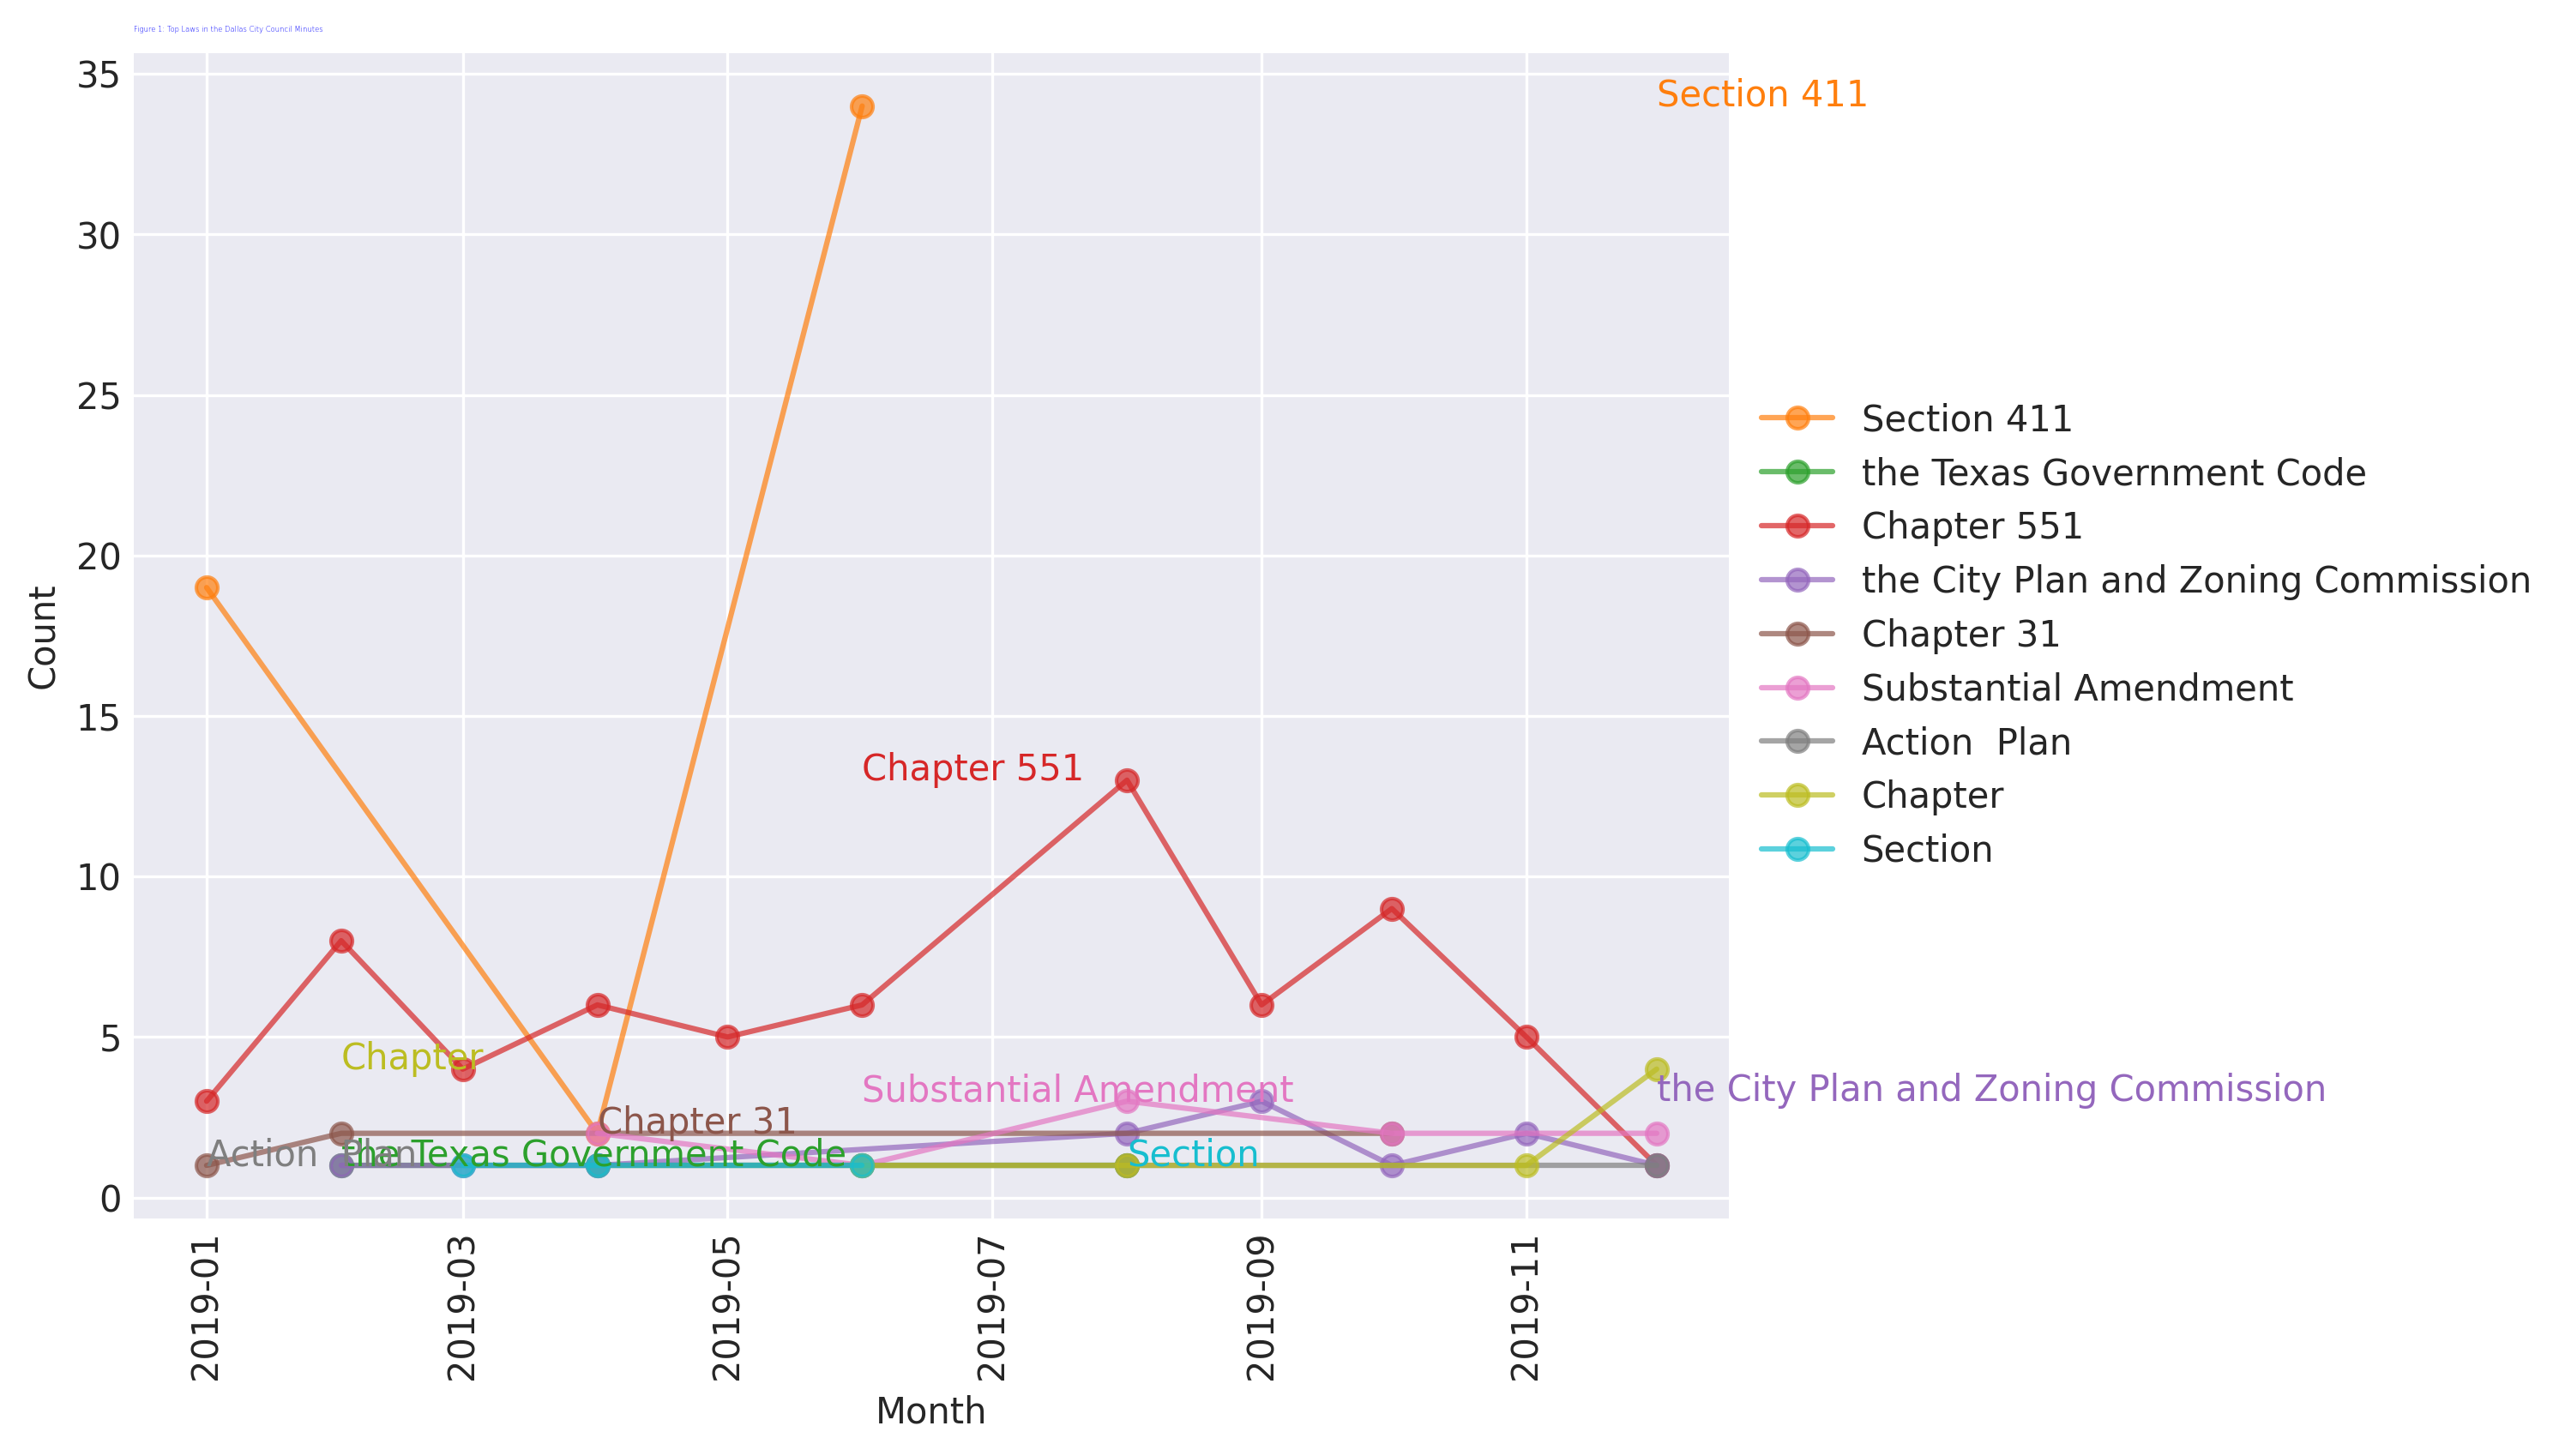

<Figure size 432x288 with 0 Axes>

In [691]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import random


%matplotlib inline

figure(figsize=(8, 6), dpi=300)

plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
palette = plt.get_cmap('tab10') # this tells matplotlib what colors to use.  you can play with this to change the colors.
num=0

for entity in set(top_laws_per_month['Laws']):
    num+=1 # for each new word, the counter 'num' changes 
    x = top_laws_per_month.loc[top_laws_per_month['Laws'] == entity, 'Month-Year']
    y = top_laws_per_month.loc[top_laws_per_month['Laws'] == entity, 'Count']
    x2, y2 = zip(*sorted(zip(x, y))) # get everything in the right order
    plt.plot(x2, # x axis 
             y2,  # y axis
             '-o', # make dots with lines
             color=palette(num), alpha=0.7, label=entity) # num tells the plot to choose a different color this time
    y3 = max(y2) # label lines at their highest point
    x3 = random.choice(top_laws_per_month[top_laws_per_month['Count'] == 1]['Month-Year'].tolist()) # more for finding the highest point
    plt.text(x3, y3, entity, color = palette(num), size = 10) # this is the code to supply a label for each line

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move the legend
plt.xticks(rotation=90)
plt.title("Figure 1: Top Laws in the Dallas City Council Minutes", loc='left', fontsize=2, fontweight=5, color='Blue')
plt.xlabel("Month")
plt.ylabel("Count")
plt.figure()


Note that for the purposes of clarifying what the graph is showing, I've used "plt.text()" to create a label for each line, and assigned that label the same color as each line.  Notice that I've also used the argument "bbox_to_anchor" for the legend to move the legend to the left of the chart.

*The output is far from ideal.*  I would much prefer to see a graph where the labels aren't overlapping (there is a module for this called adjust_text, which we'll explore later)

But the point of this exercise is to show one possible strategy for making charts clearer and more intuitive.

It will be the responsibility of each student group to decide on the appropriate strategy for each data set.  An appropriate strategy is one that shows you pertinent information and which is legible.

## Let's do the same thing with some other categories

We'd probably like to search for multipe categories.  

Let's create a function that will apply named entity recognition for a single category, count the stuff over months, find the stuff mentioned over multiple months, and plot it in a line chart.

First, let's just run the named entity recognizer one more time over our data to get a list of all possible named entities.

 ***This may take some time. Get a cup of tea.***

In [692]:
named_entities1 = [nlp(doc) for doc in dallas_minutes_year1['Text']]

In [693]:
##### alternative syntax
# named_entities = dallas_minutes_year1['Text'].apply(lambda x: nlp(x))

Let's define a function, ner_mapper.

The point of our creating a function here is to show that we can recapitulate all of the code in this notebook, starting with the original dataframe, in such a way that we can efficiently mine the text for multiple kinds of named entity (ORG, GPE, PERSON, etc), thus allowing us to make multiple graphs.

Following the line beginning with "def", all of the code *inside* the function is code that you have seen before.  

Here is what happens.

In the line beginning with "def," we define a new function, naming it, ner_mapper.  We also tell Python that our new function will take three objects:

   * dataframe1 - a dataframe with column "Month-Year"
   * column1 - a parsed column of named entities, corresponding to the "text" column of dataframe1
   * label1 - a label of Spacy named entity categories, for example 'GPE' or 'ORG'
   
Inside the function:

   * We filter just for the named entities that match label1.
   * We group those named entities by month-year and count how many there are.
   * We find the named entities that are spoken about over 3 months or more.
   * We plot a line graph showing those named entities over time.
   * We save the figure.


In [694]:
import numpy as np

In [695]:
def ner_mapper(dataframe1, column1, label1):
    
    print('*****************')
    print('LOOKING FOR ', label1)
    print('**')
    
    # filter only for the named entities matching label1 and convert Spacy data to a list of strings
    new_column = [[str(ent) for ent in doc.ents if ent.label_ == label1] for doc in column1]
    
    # count overall instances of named entities
    stuffcount = []
    for row in new_column:
        for item in row:
            stuffcount.append(str(item))
    stuffcount[:5]
    top_stuff = pd.Series.value_counts(stuffcount).nlargest(10)
    top_stuff = pd.DataFrame(top_stuff).reset_index()
    top_stuff.columns = ['Stuff', 'Count']
    top_stuff = top_stuff[top_stuff['Count'] > 1]

    print("The top instances of " + label1 + " are:")
    print(top_stuff[:5])

    # add named entities back to dataframe, explode data, count entities by Month-Year
    dataframe1['Stuff'] = new_column
    dataframe1 = dataframe1.explode('Stuff').dropna()
    stuff_per_month = dataframe1.groupby(['Month-Year', 'Stuff'])['Stuff'].count()
    stuff_per_month = pd.DataFrame(stuff_per_month) # convert from Series to DataFrame
    stuff_per_month.columns = ['Count'] # label the one column "count"
    stuff_per_month = stuff_per_month.reset_index() # turn the multi-index into columns 'year' and 'vocab'
    stuff_per_month[:5]
    
    # count in how many months each named entity appears, take overall most frequent and most popular
    number_of_months_referenced = stuff_per_month.groupby(['Stuff'])['Month-Year'].count().sort_values(ascending = False)  # count in how many months stuff is talked about 
    number_of_months_referenced = pd.DataFrame(number_of_months_referenced)
    number_of_months_referenced.columns = ['Count'] # label the one column "count"
    frequently_referenced = number_of_months_referenced[:10].reset_index()
    top_per_month = stuff_per_month[stuff_per_month['Stuff'].isin(frequently_referenced['Stuff'])]

    tosearch = top_per_month['Stuff'].tolist().append(top_stuff['Stuff'].tolist())

    top_over_time = stuff_per_month[stuff_per_month['Stuff'].isin(top_per_month['Stuff'].tolist() + top_stuff['Stuff'].tolist())] # get the occurrences per month of the stuff talked about in multiple monhts
    #top_over_time = top_over_time[top_over_time['Count'] > 1] # Get things mentioned more than once per period
    
    top_over_time['Month-Year'] = pd.to_datetime(top_over_time['Month-Year'], format='%m-%Y', errors='coerce')

    # Graph entities 
    plt.clf() # clear last output
    figure(figsize=(8, 6), dpi=300)
    
    plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
    palette = plt.get_cmap('tab20b') # this tells matplotlib what colors to use.  you can play with this to change the colors.
    num=0
    
    
    for entity in set(top_over_time['Stuff']): # one loop for each color/line
        
        # get points
        num+=1 # for each new word, the counter 'num' changes 
        x = top_over_time.loc[top_over_time['Stuff'] == entity, 'Month-Year'] # x points
        y = top_over_time.loc[top_over_time['Stuff'] == entity, 'Count'] # y points
        x2, y2 = zip(*sorted(zip(x, y))) # get everything in the right order
        
        # make a line
        plt.plot(x2, # x axis 
             y2,  # y axis
             '-o', # make dots with lines
             color=palette(num), alpha=0.7, label=entity) # num tells the plot to choose a different color this time
        
        # make labels
        y3 = max(y2) # label lines at their highest point
        x3 = random.choice(top_over_time[top_over_time['Count'] == 1]['Month-Year'].tolist()) # more for finding the highest point
        plt.text(x3, y3, entity, color = palette(num), size = 10) # this is the code to supply a label for each line

    legd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move the legend
    
    plt.xticks(rotation=90)
    plt.title("Figure: Top " + label1 + "s in the Dallas City Council Minutes", loc='left', fontsize=25, fontweight=5, color='Blue')
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.subplots_adjust(right=0.9) # add padding to the right so it doesn't get cut off
    plt.savefig('dallas-city-council-2019-ner-for-' + label1 + '-.jpg', bbox_inches='tight') # save - with extra commands so it doesn't get cut off 
    plt.figure()


Try out our new function. It should run smoothly because we've already gathered the time-intensive NER information in a separate dataframe, named_entities.

*****************
LOOKING FOR  EVENT
**
The top instances of EVENT are:
                             Stuff  Count
0             the Dallas City Code    246
1      the Dallas Development Code    135
2  the Dallas City Code  Financing     80
3     Hike and Bike Trail Easement     78
4            the September 25 2019     66


IndexError: Cannot choose from an empty sequence

<Figure size 432x288 with 0 Axes>

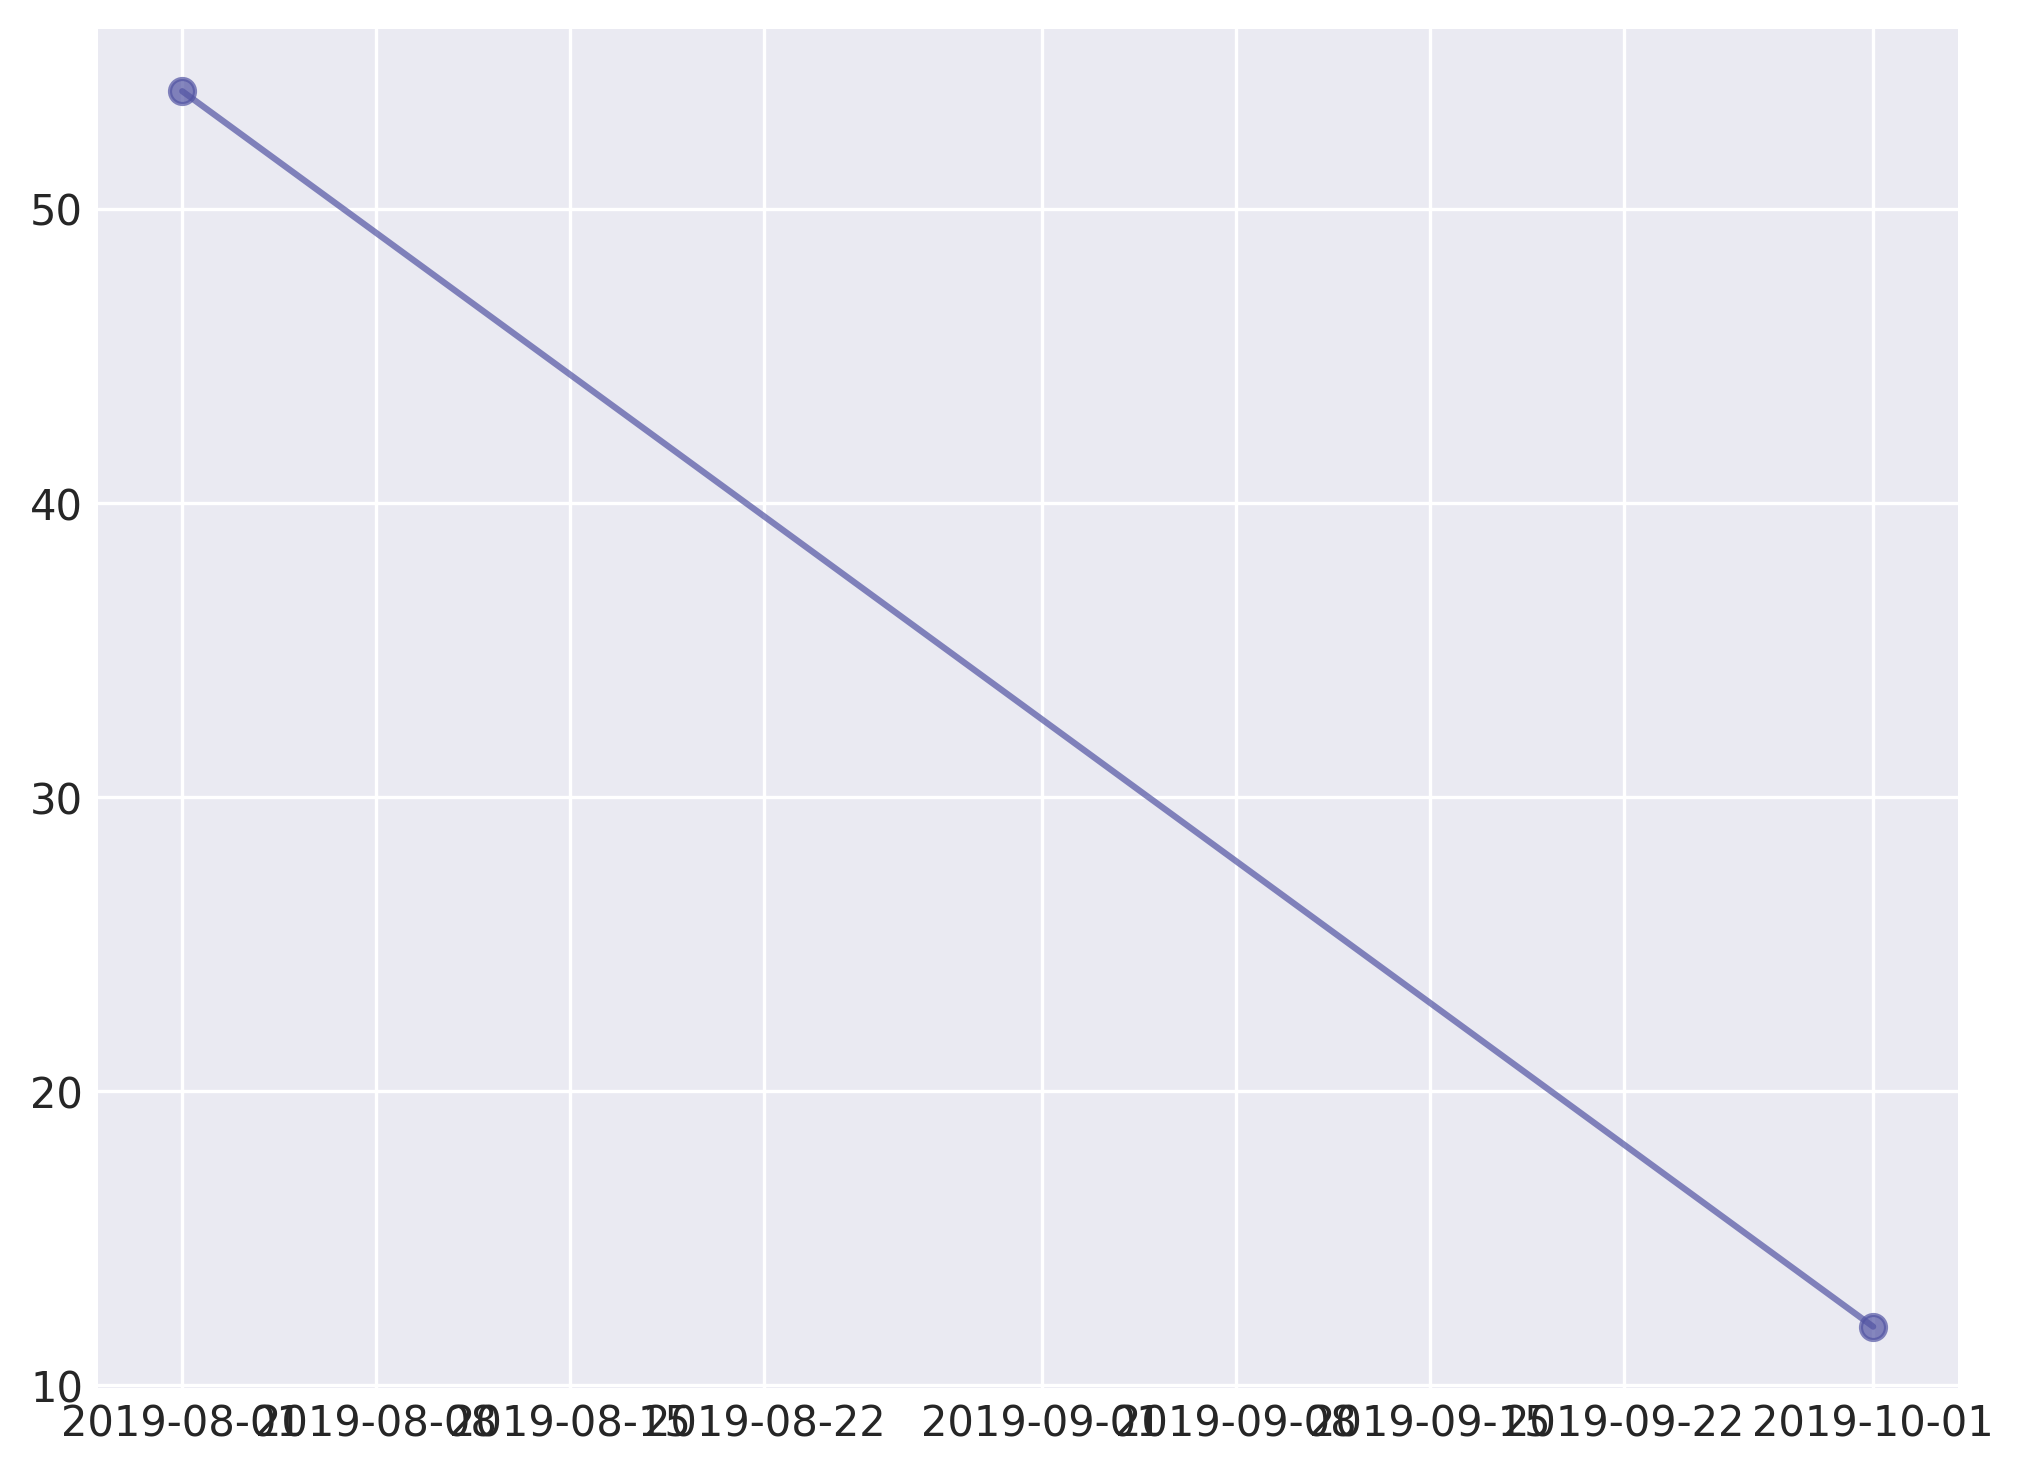

In [696]:
ner_mapper(dallas_minutes_year1, named_entities1, 'EVENT')

Now, let's write a for loop to cycle through multiple categories.  ***This will also take time. You're welcome to skip it. Just notice that we can compare lots of analyses if we reduce our complex cold to a function and loop through multiple aspects of the data.***

In [ ]:
for cat in ['LOC', 'PERSON', 'GPE', 'EVENT', 'ORG']:
    ner_mapper(dallas_minutes_year1, named_entities1, cat)

## Do all the minutes!

You're probably already hating the process of waiting for Spacy to run nlp() to parse the named entities.  That's right -- it's time consuming and slow, and that's for the Dallas City Council Minutes, which are one of our smallest datasets. 

If or when you decide to run Spacy's NER on your own dataset, you'll probably have to deal with a lot of waiting. However, you can follow some of the processes in this notebook to help you along:

  * You can try different modes of doing the same analysis. You can use timing code to keep track of which process is fastest.
  * You can write functions that work on a small subset of data. 
  * Once you have a working prototype for your code, you can apply your functions to a larger set of data and leave the computer running all night -- or all week or month if you have to.  

If you're running code for a full day or even week, there are extra options that will allow you to start your Python code and walk away, downloading the results when everything is finished. Check in with the M2 staff if you need more guidance about running slow Python code.

For THIS data, however, we've already run the boring part for you!  We ran the Spacy parser on the full Dallas dataset overnight, and stored the results in the city_council folder below.  The new function that follows, ner_mapper_all_dallas, reads in the stored datasets for each possible NER label.  mYou just have to run the function, loading saved information for 15 years of Dallas minutes.

In [526]:
##### Here's the code to extract the named entities from the entire dallas minutes
#named_entities = [nlp(doc) for doc in dallas_minutes['Text']]

In [ ]:
cd /scratch/group/history/hist_3368-jguldi/city_council

In [660]:
def ner_mapper_all_dallas(label1):

    stuff_per_month = pd.read_csv('named-entities-per-month-for-dallas-' + label1 + ".csv") # save a copy of the data

    # count in how many months each named entity appears, take overall most frequent and most popular
    number_of_months_referenced = stuff_per_month.groupby(['Stuff'])['Month-Year'].count().sort_values(ascending = False)  # count in how many months stuff is talked about 
    number_of_months_referenced = pd.DataFrame(number_of_months_referenced)
    number_of_months_referenced.columns = ['Count'] # label the one column "count"
    frequently_referenced = number_of_months_referenced[:10].reset_index()
    top_per_month = stuff_per_month[stuff_per_month['Stuff'].isin(frequently_referenced['Stuff'])]


    tosearch = top_per_month['Stuff'].tolist() 

    top_over_time = stuff_per_month[stuff_per_month['Stuff'].isin(top_per_month['Stuff'].tolist() + top_stuff['Stuff'].tolist())] # get the occurrences per month of the stuff talked about in multiple monhts
    #top_over_time = top_over_time[top_over_time['Count'] > 1] # Get things mentioned more than once per period
    
    top_over_time['Month-Year'] = pd.to_datetime(top_over_time['Month-Year'], format='%m-%Y', errors='coerce')

    # Graph entities 
    plt.clf() # clear last output
    figure(figsize=(8, 6), dpi=300)
    
    plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
    palette = plt.get_cmap('tab20b') # this tells matplotlib what colors to use.  you can play with this to change the colors.
    num=0
    
    
    for entity in set(top_over_time['Stuff']): # one loop for each color/line
        
        # get points
        num+=1 # for each new word, the counter 'num' changes 
        x = top_over_time.loc[top_over_time['Stuff'] == entity, 'Month-Year'] # x points
        y = top_over_time.loc[top_over_time['Stuff'] == entity, 'Count'] # y points
        x2, y2 = zip(*sorted(zip(x, y))) # get everything in the right order
        
        # make a line
        plt.plot(x2, # x axis 
             y2,  # y axis
             '-o', # make dots with lines
             color=palette(num), alpha=0.7, label=entity) # num tells the plot to choose a different color this time
        
        # make labels
        y3 = max(y2) # label lines at their highest point
        x3 = random.choice(top_over_time[top_over_time['Count'] == 1]['Month-Year'].tolist()) # more for finding the highest point
        plt.text(x3, y3, entity, color = palette(num), size = 10) # this is the code to supply a label for each line

    legd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # move the legend
    
    plt.xticks(rotation=90)
    plt.title("Figure: Top " + label1 + "s in the Dallas City Council Minutes", loc='left', fontsize=25, fontweight=5, color='Blue')
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.subplots_adjust(right=0.9) # add padding to the right so it doesn't get cut off
    plt.savefig('dallas-city-council-2019-ner-for-' + label1 + '-.jpg', bbox_inches='tight') # save - with extra commands so it doesn't get cut off 
    plt.figure()


*****************
LOOKING FOR  LAW
**
The top instances of LAW are:
                                               Stuff  Count
0                                        Chapter 551   1730
1                          the Texas Government Code    852
2  Section 713 of the City Council Rules of Proce...    625
3  Section 713 of the City Council Rules of Proce...    551
4     Chapter 372 of the Texas Local Government Code    146
*****************
LOOKING FOR  LOC
**
The top instances of LOC are:
                  Stuff  Count
0              District   1413
1  Multifamily District    388
2             Southwest    243
3      Walnut Hill Lane    135
4    Councilmember Hill    118
*****************
LOOKING FOR  PERSON
**
The top instances of PERSON are:
            Stuff  Count
0            Kirk   3040
1          Miller   2780
2        Rawlings   2174
3         Leppert   1886
4  Pro Tem Atkins   1690
*****************
LOOKING FOR  GPE
**
The top instances of GPE are:
          Stuff  Count
0  

<Figure size 432x288 with 0 Axes>

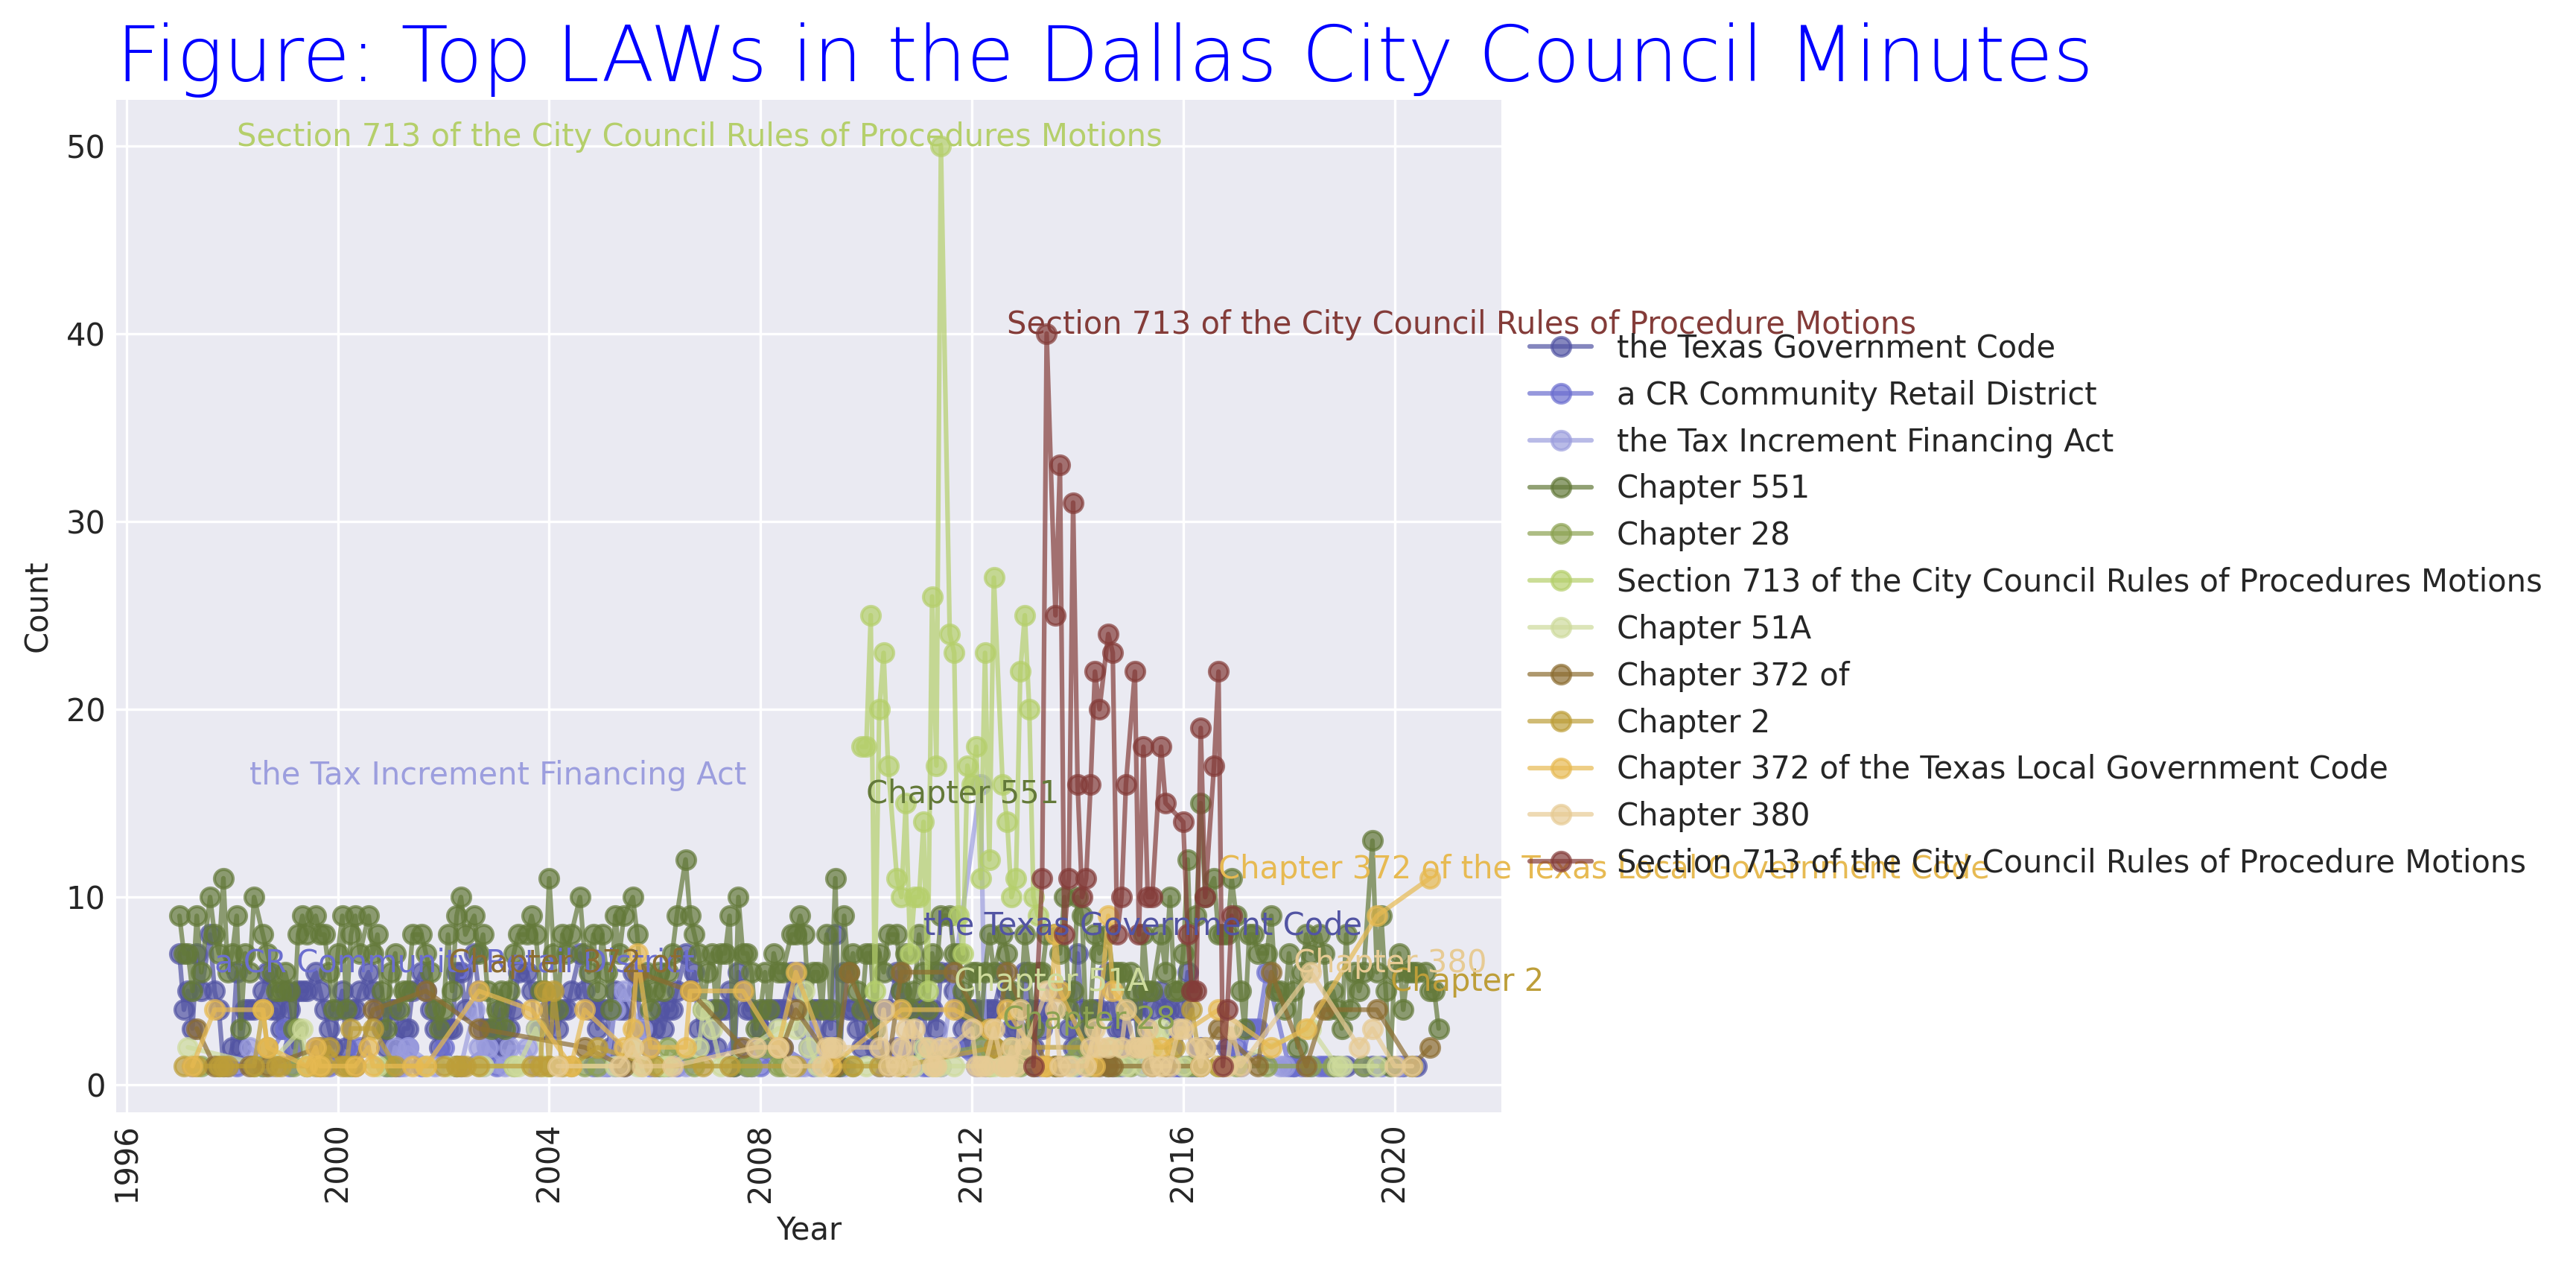

<Figure size 432x288 with 0 Axes>

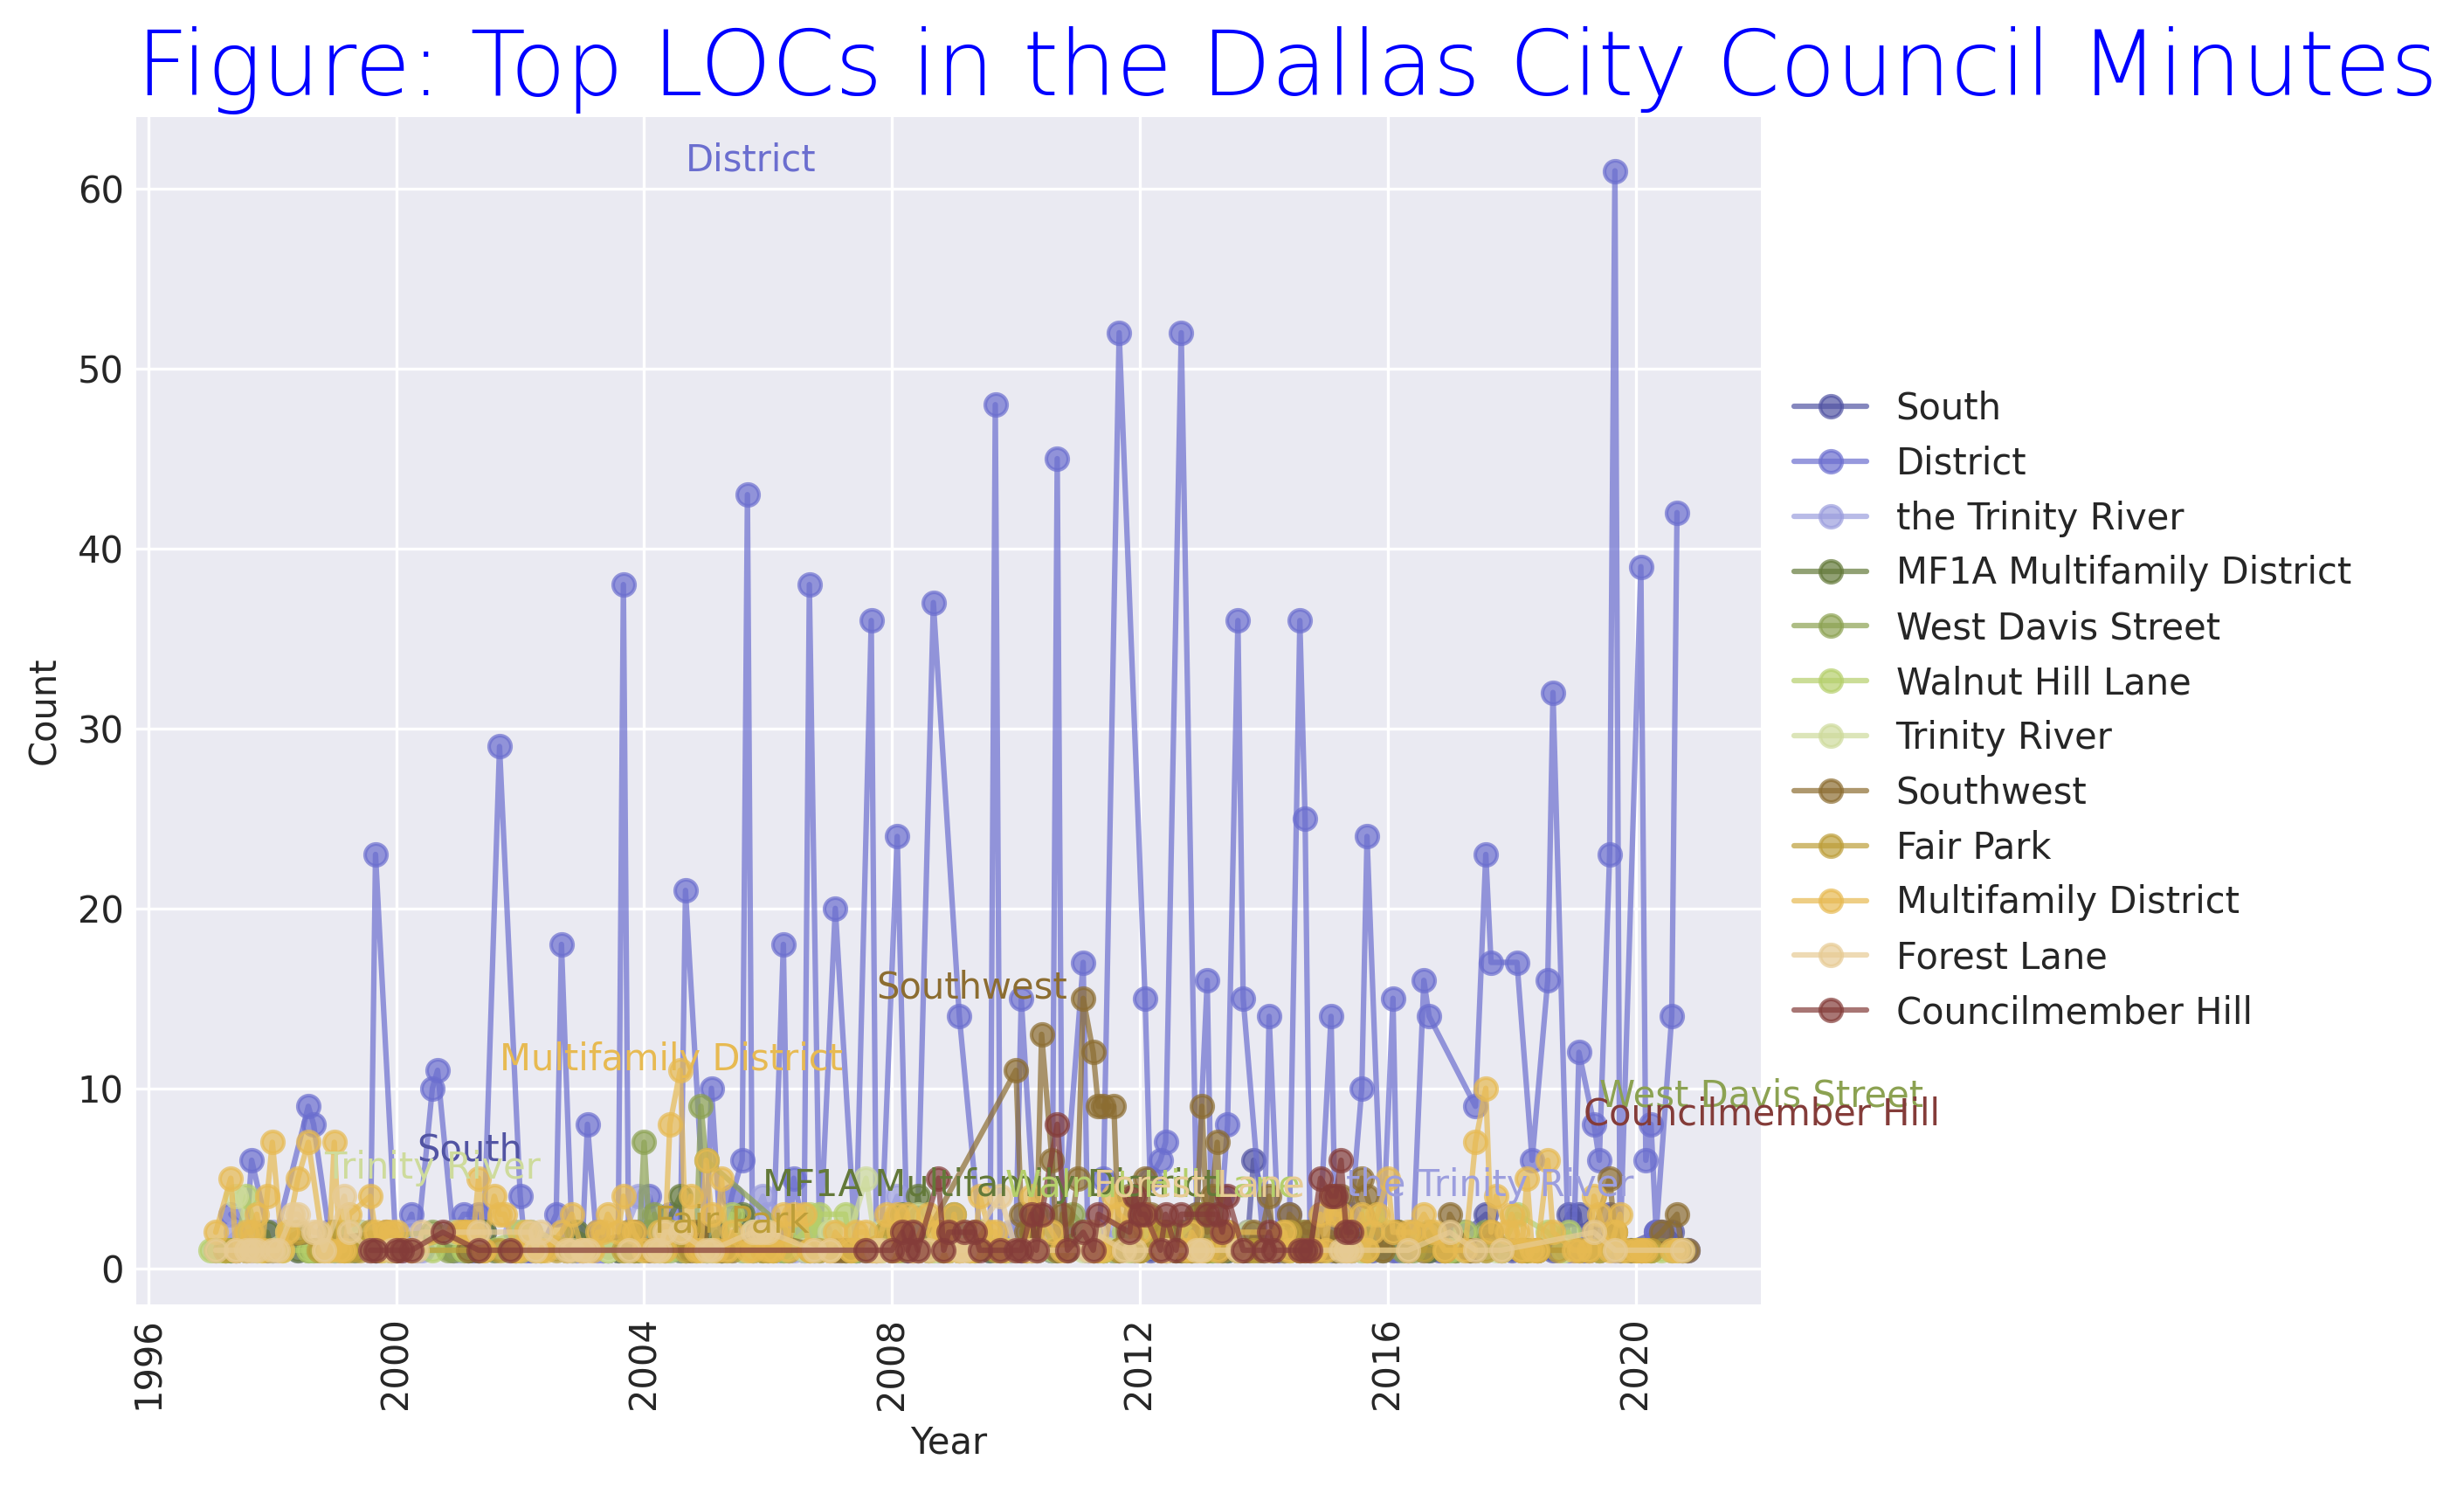

<Figure size 432x288 with 0 Axes>

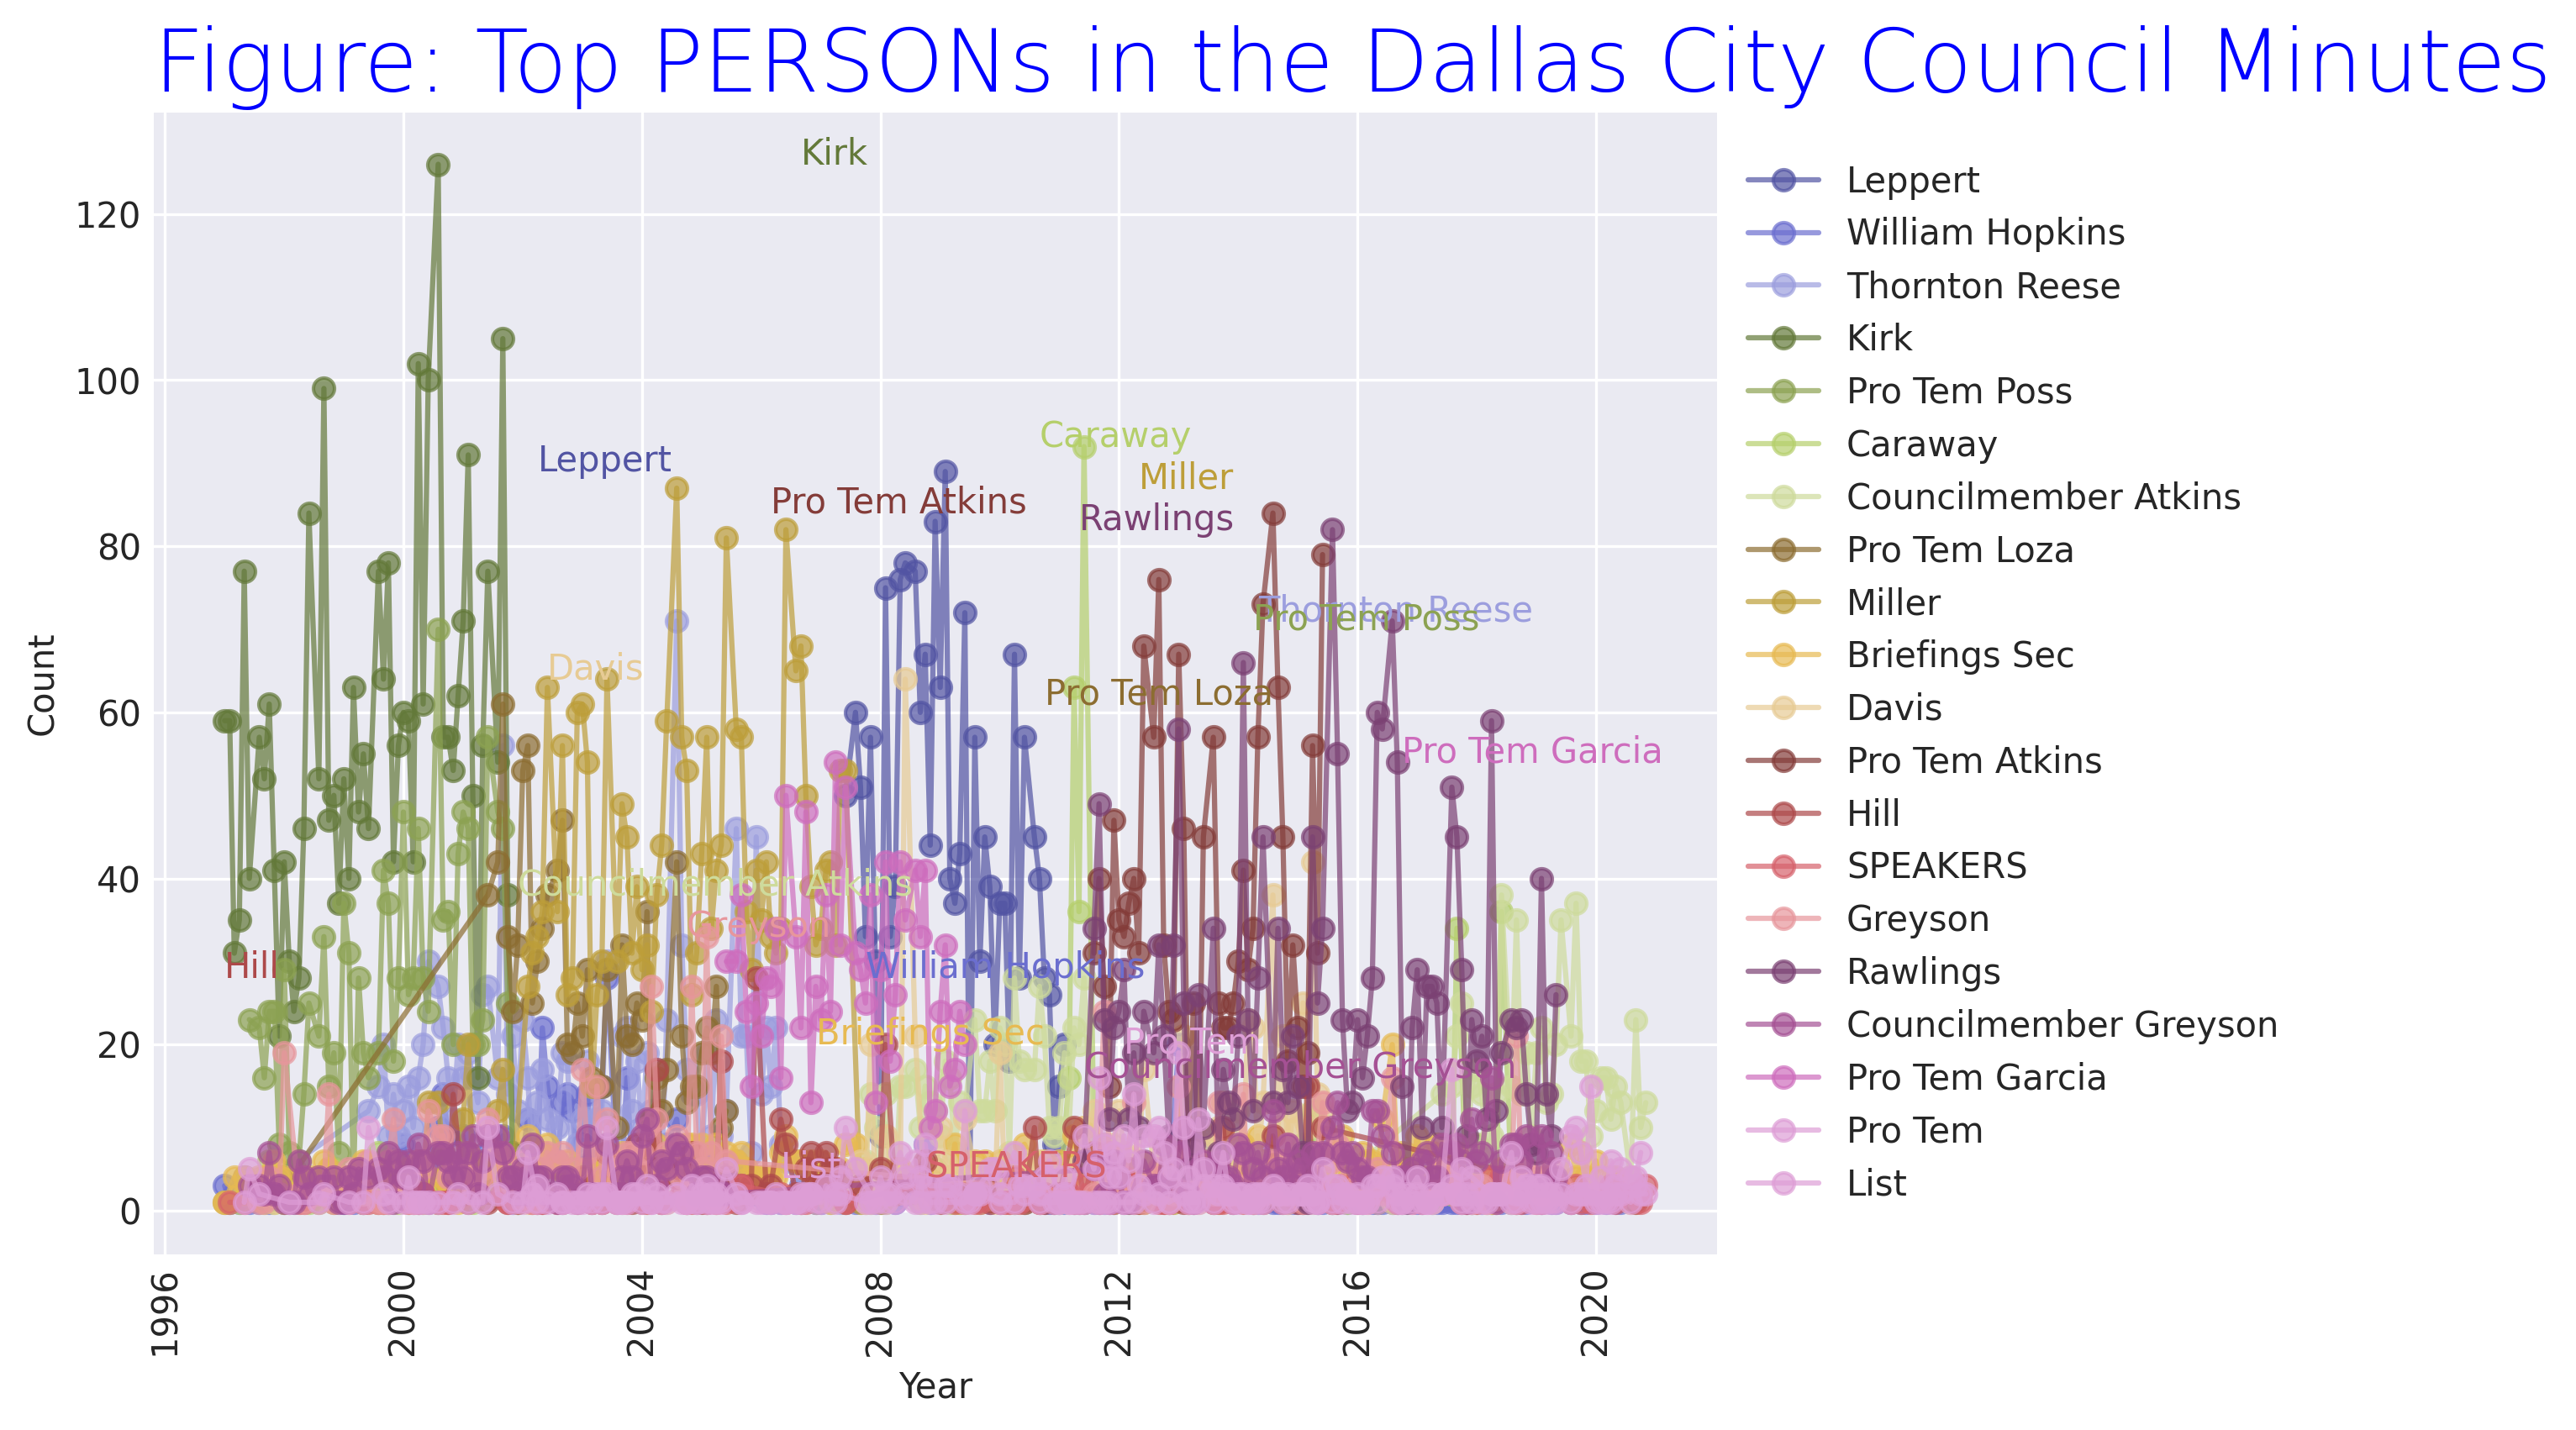

<Figure size 432x288 with 0 Axes>

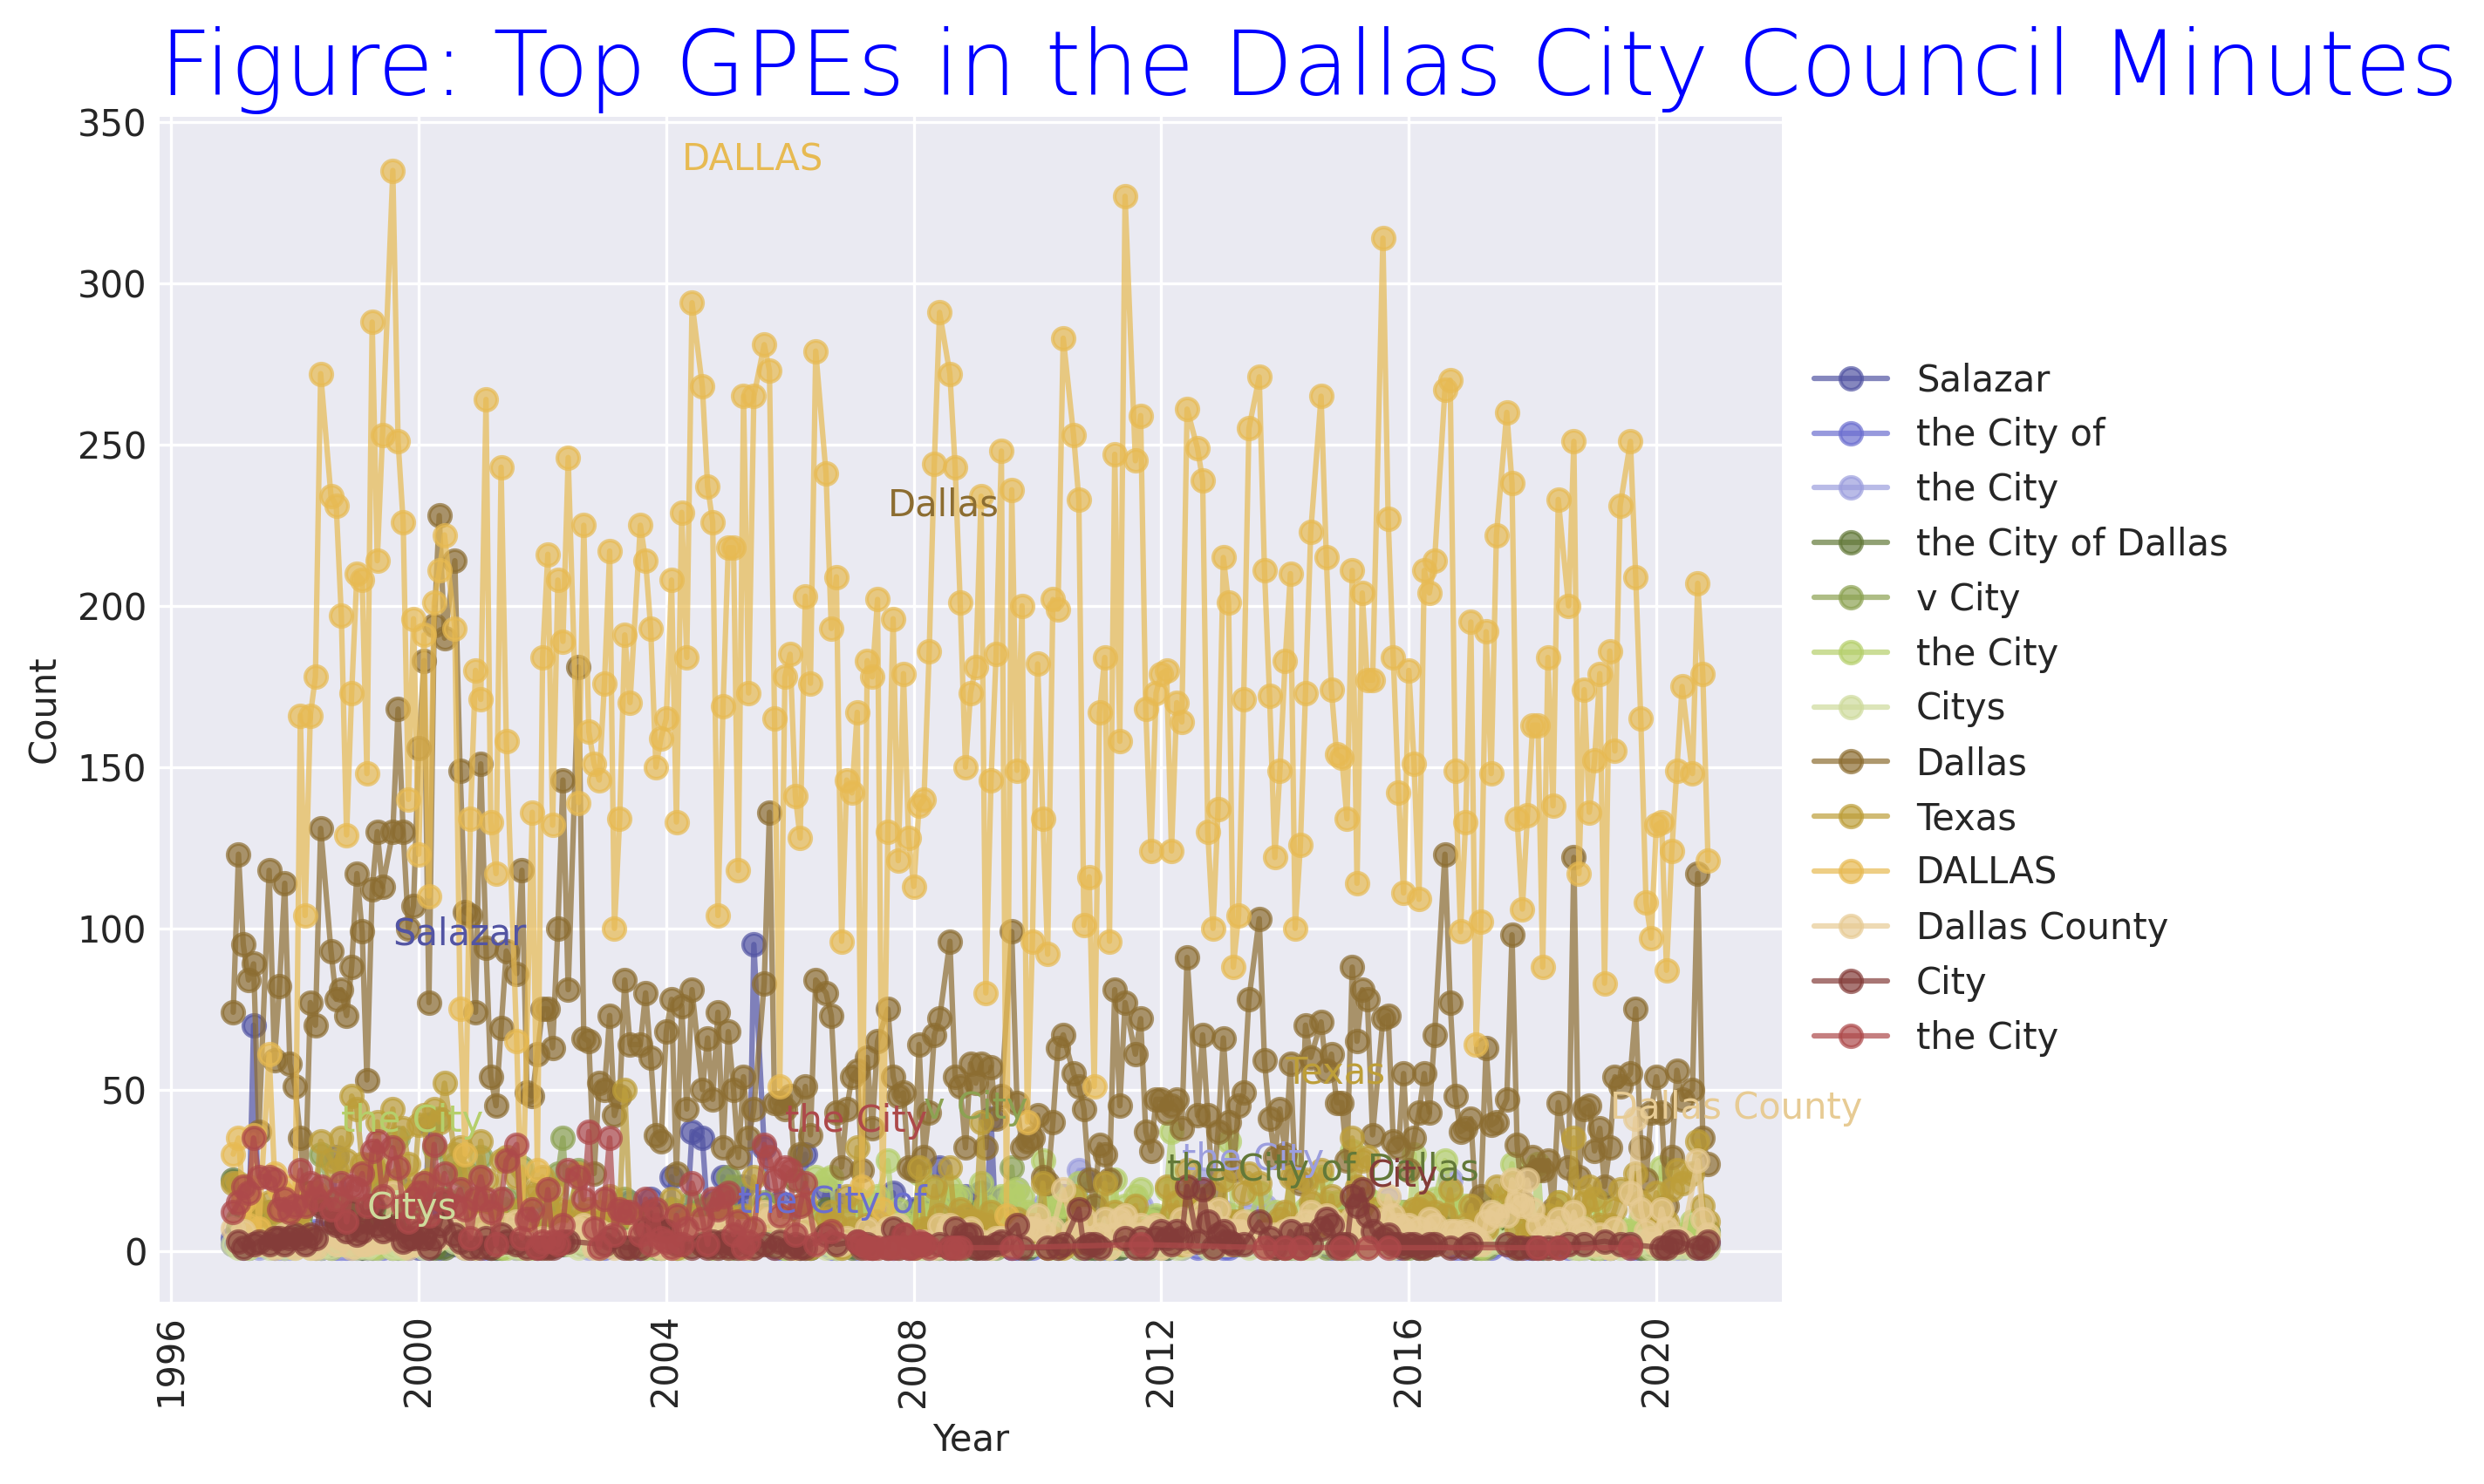

<Figure size 432x288 with 0 Axes>

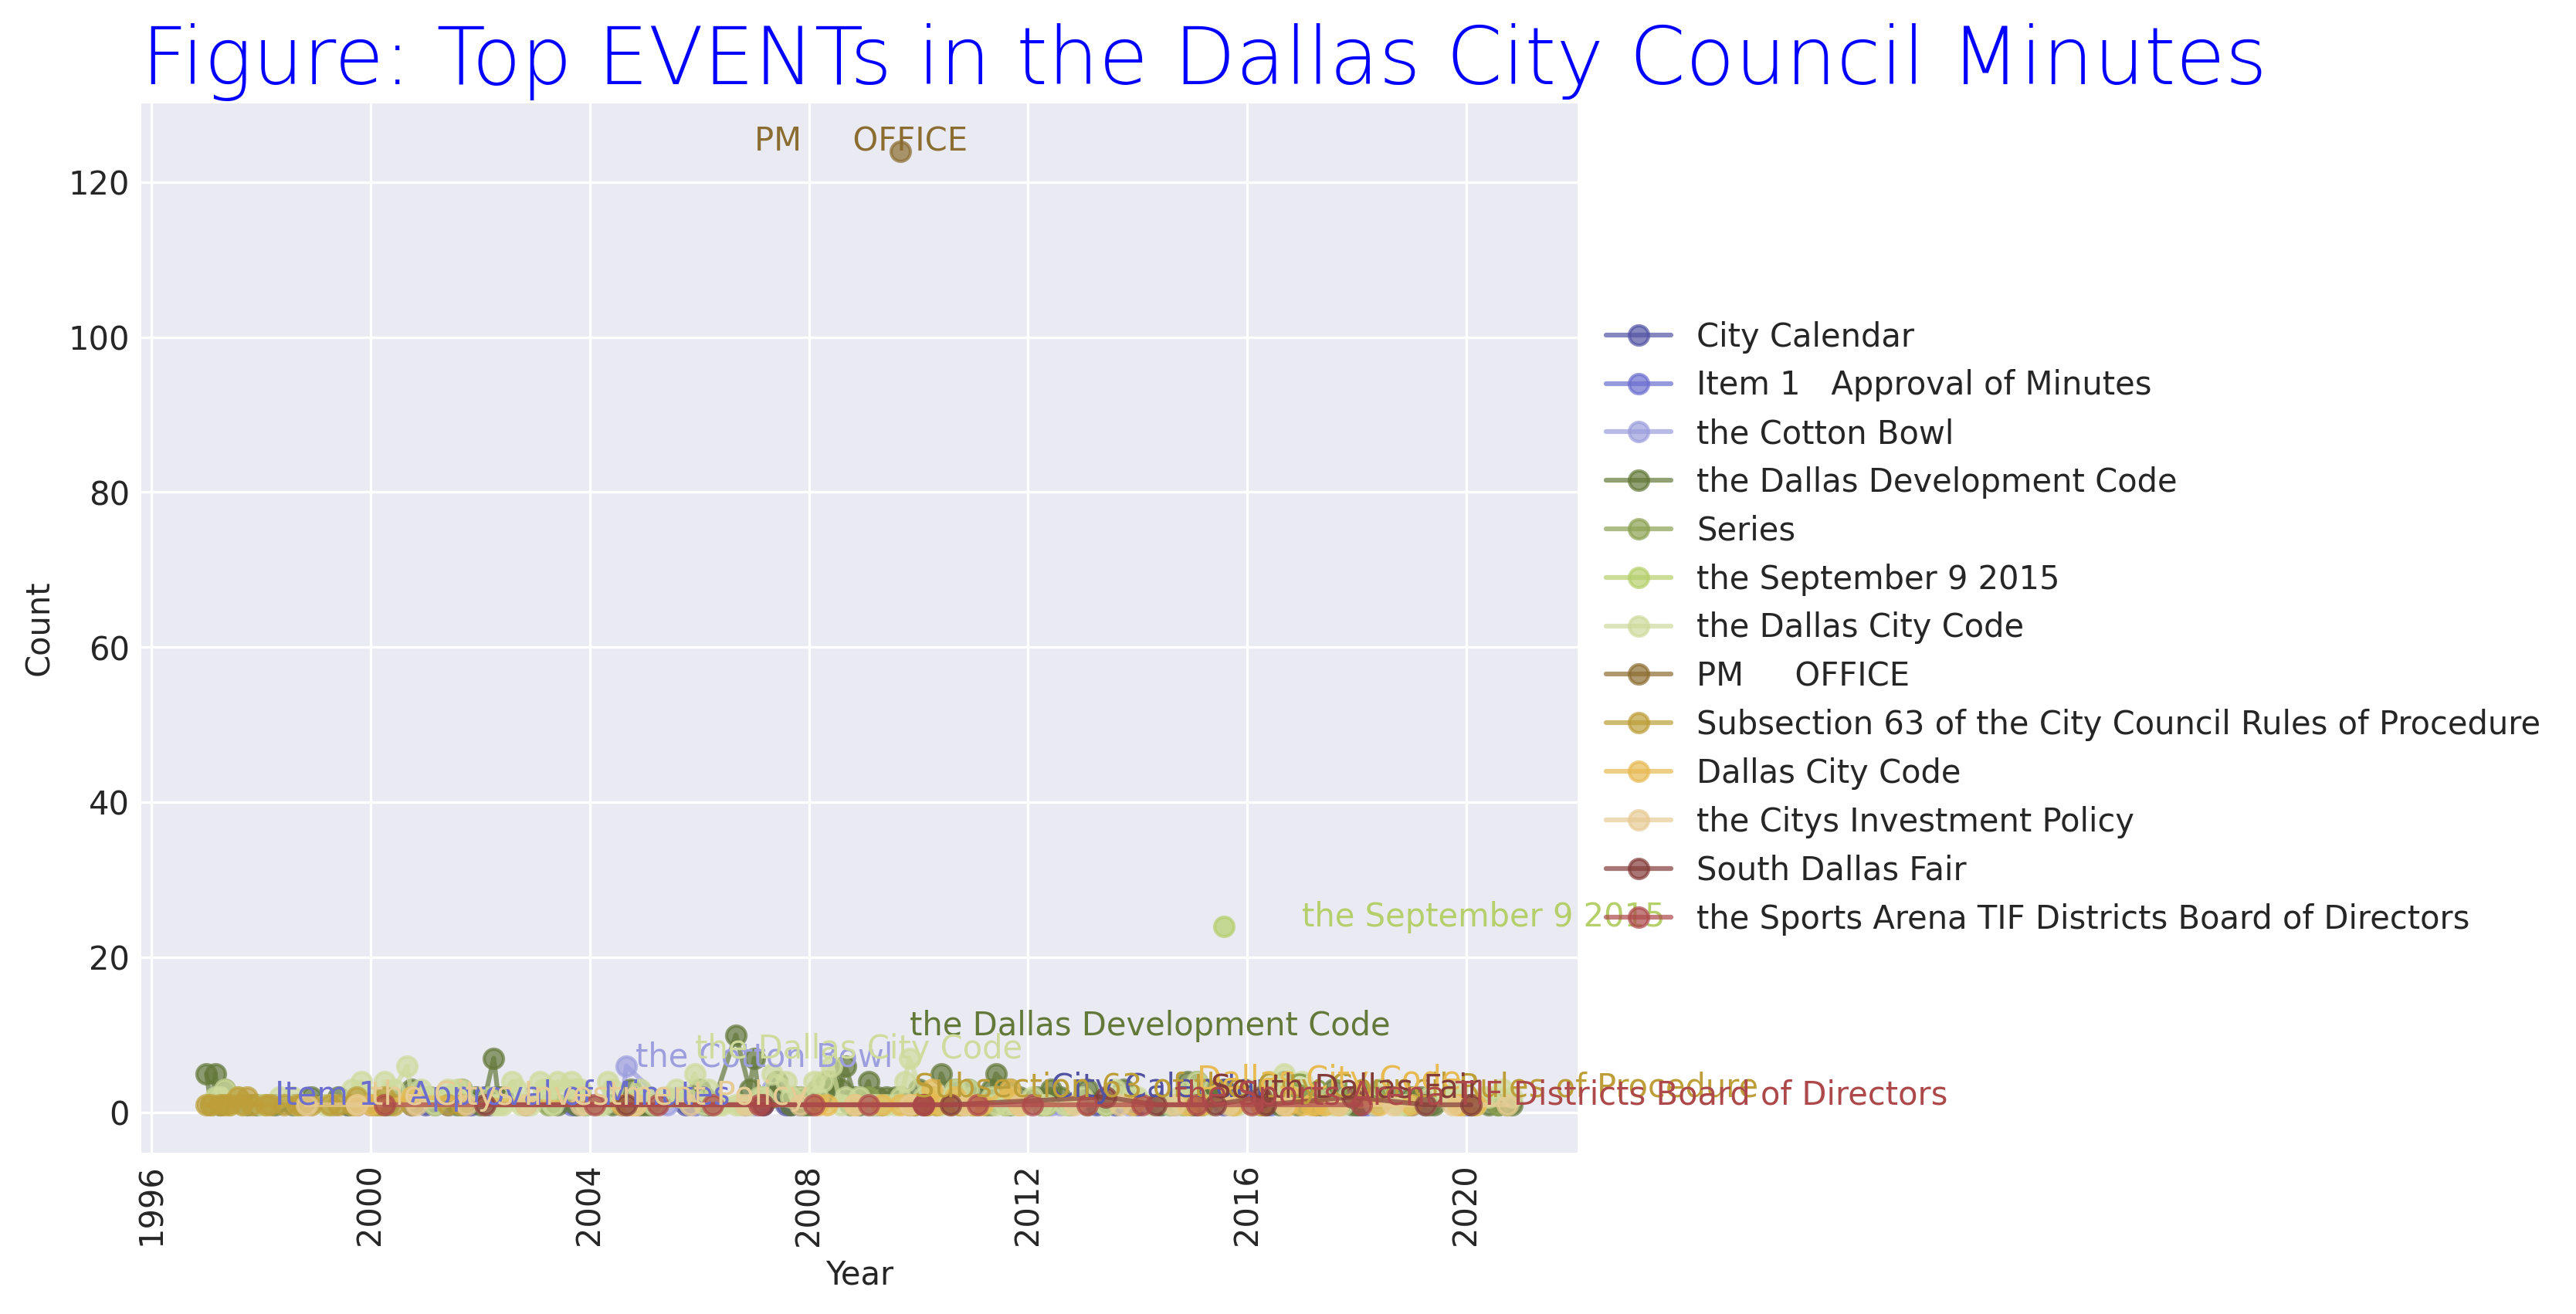

<Figure size 432x288 with 0 Axes>

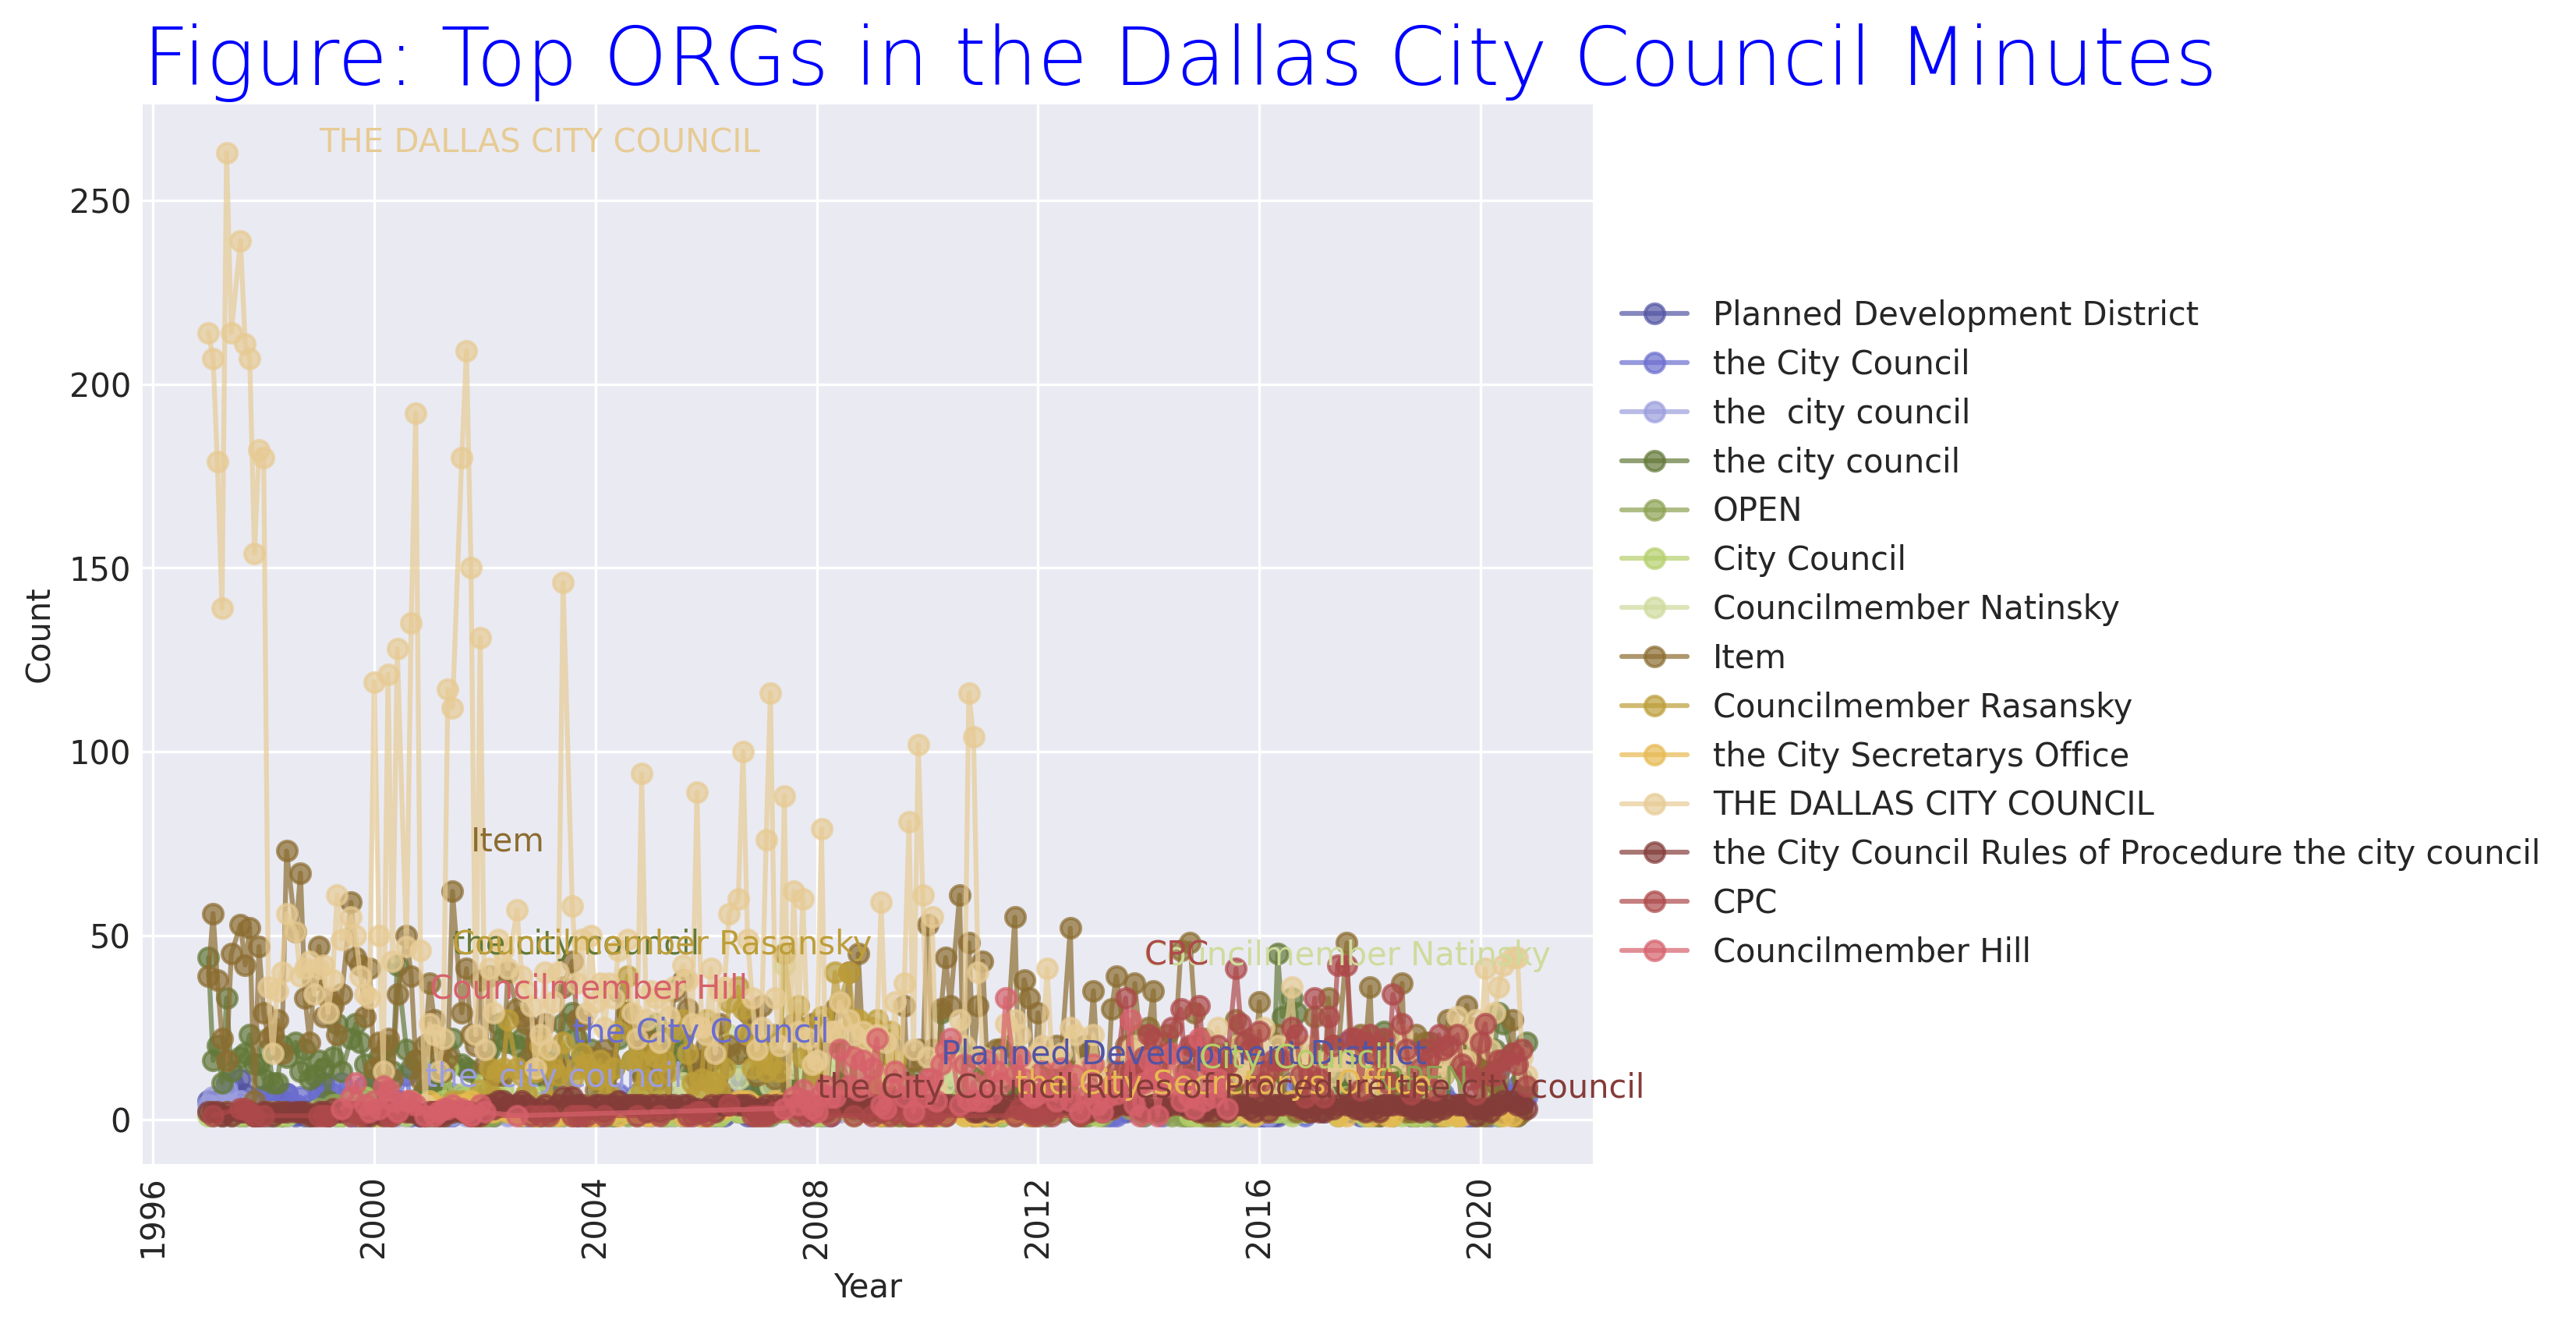

<Figure size 432x288 with 0 Axes>

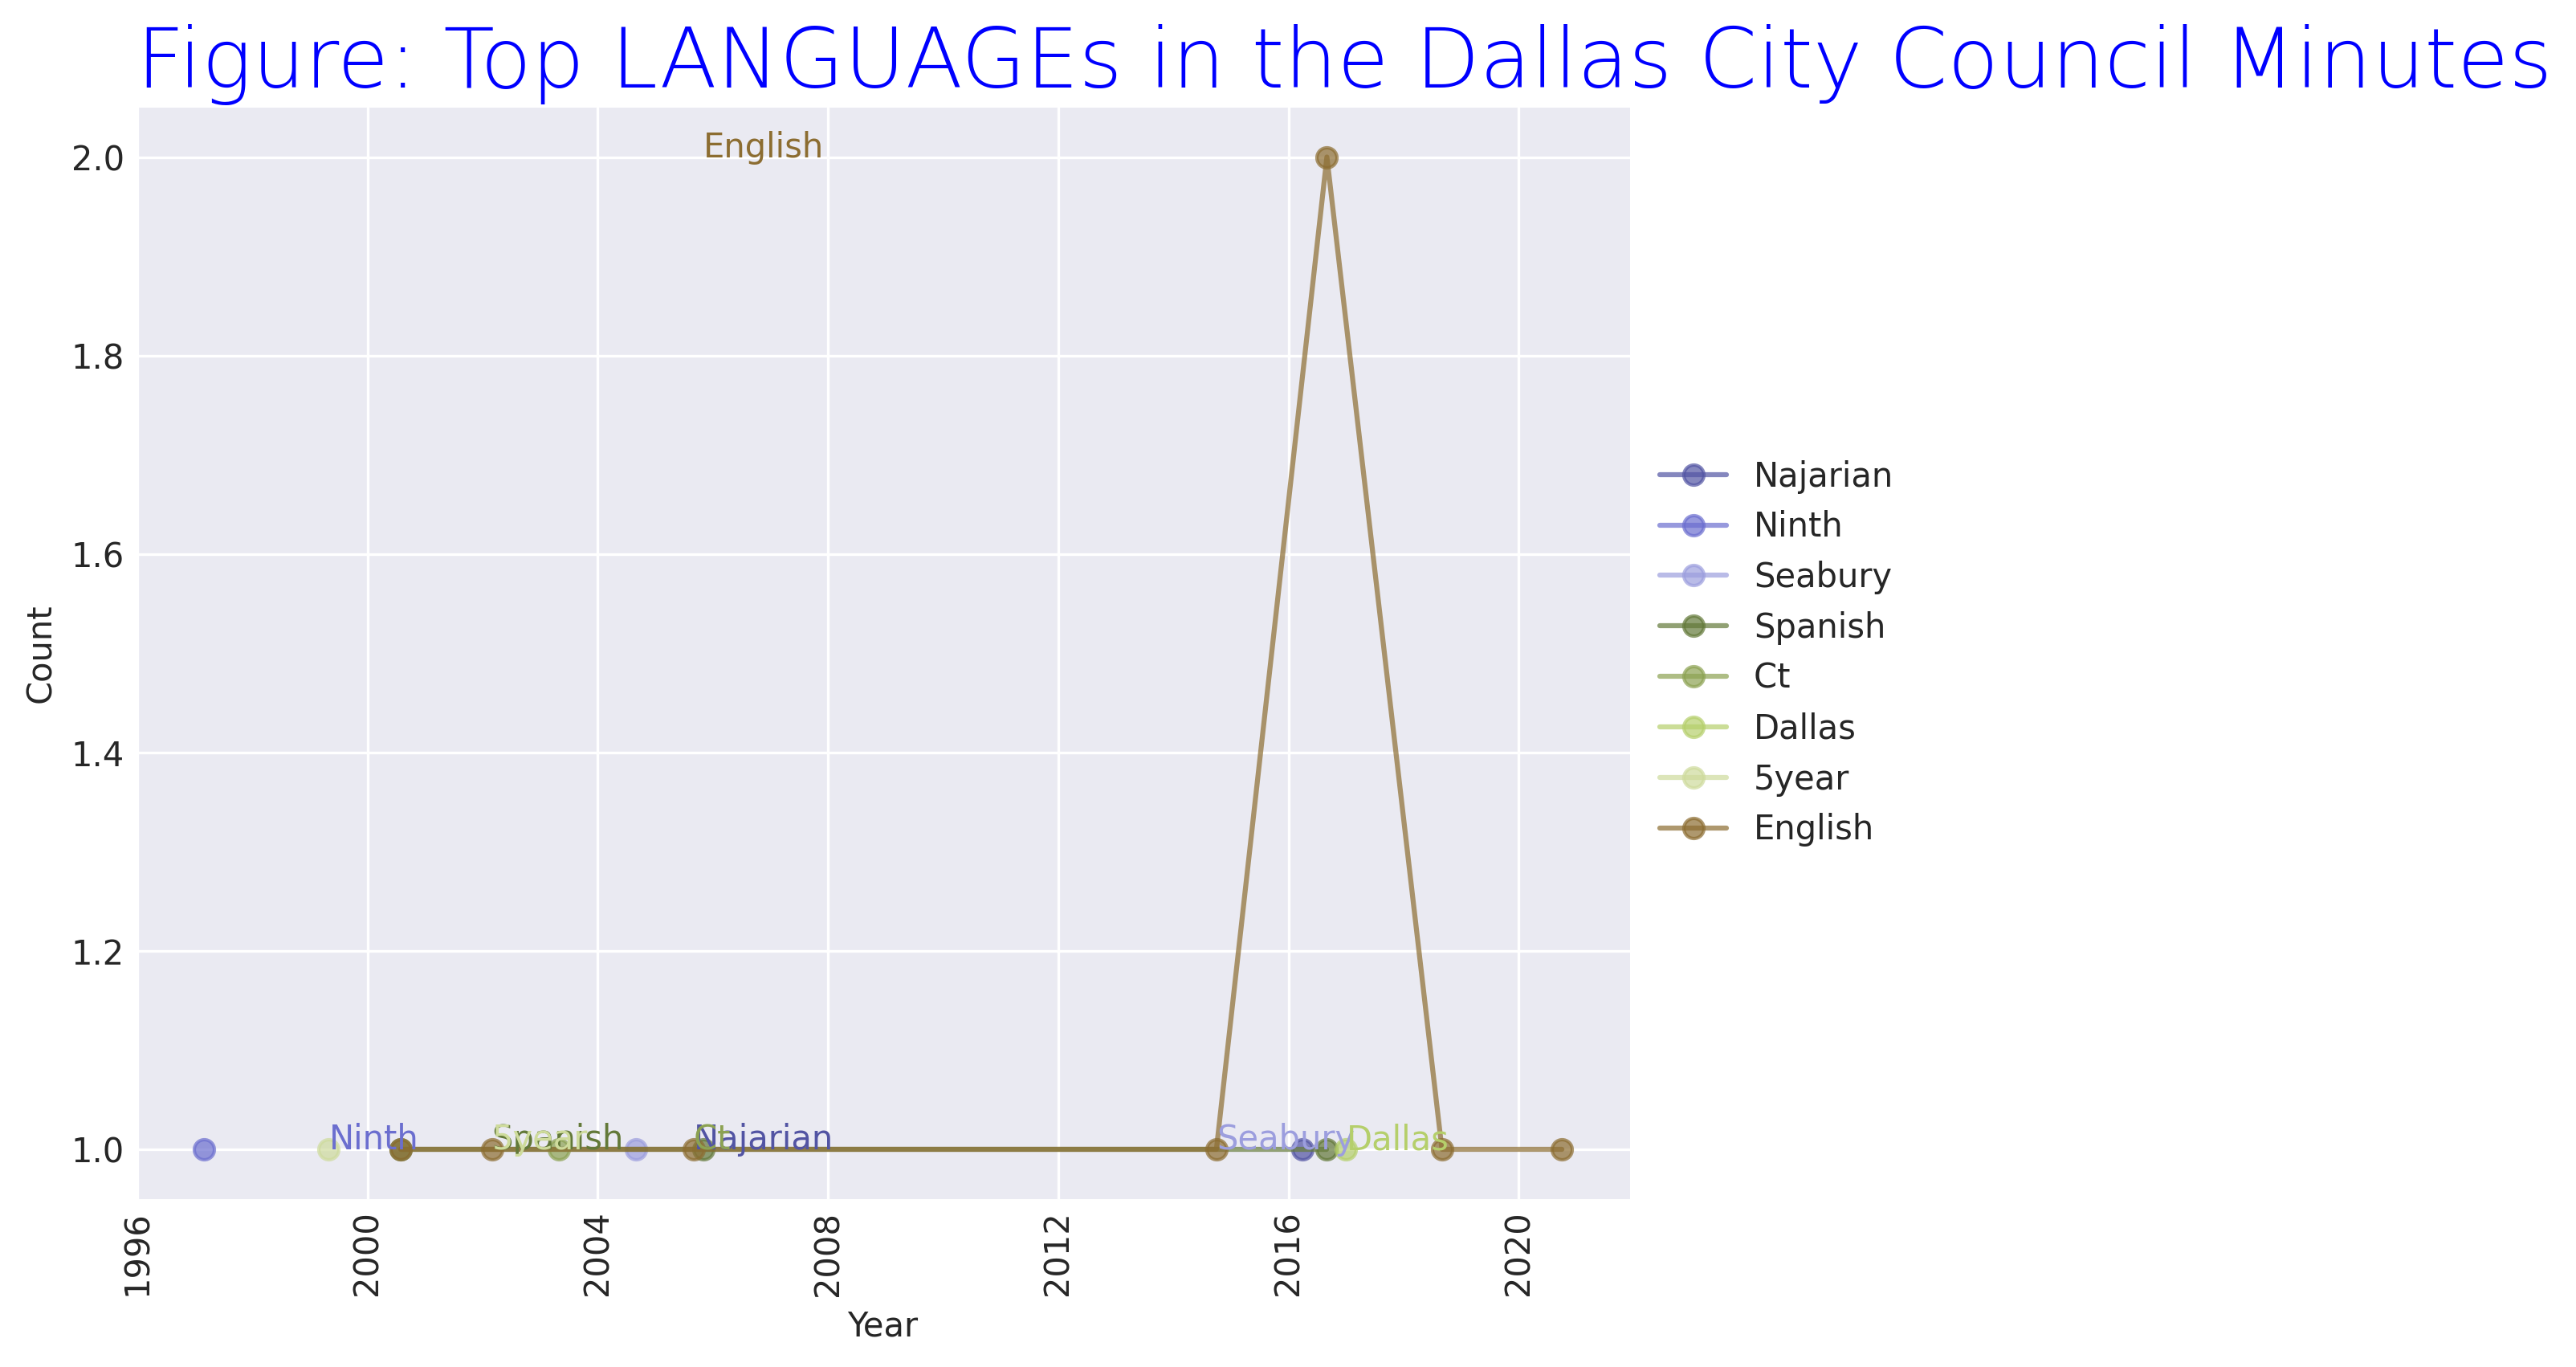

<Figure size 432x288 with 0 Axes>

In [659]:
for cat in ['LAW', 'LOC', 'PERSON', 'GPE', 'EVENT', 'ORG', 'LANGUAGE']:
    ner_mapper_all_dallas(cat)

## Assignment

While our work with named entities is coming along, there's still a lot of bad information -- which distorts the graphs -- and clutter -- which makes the graphs hard to read.

*Thinking About the Results*

 * In the code above, we saw TWO ways to decide which entities were most important.  
    * One is to count the total number of months where an entity was mentioned -- a process that favors entities that were talked about regularly. 
    * The other is to count the overall presence of each entity, choosing the entities that were mentioned the most overall. 
    * We could imagine lots of other ways of deciding which entities deserve to be graphed.  What about counting the monthly high of each entity, then choosing the entities with the highest count for any month. 
    
    *In a paragraph of at least three sentences, please answer:*
    
    * What are the differences between these three approaches?  
    * Which approach should you use if you want to understand change over time -- how some months are different than others?
    
*Coding Exercise*

Change the code to adjust for the following criteria:

 * Remove any points that represent a count of less than 3.
 
 * Create a stopwords list for three of the entities (e.g., "GPE," "LOCs," and "Person") and get rid of ambiguous terms (such as "South," which could mean "South of 635" rather than "South Dallas), terms that are clearly misclassified, or terms that convey no information, for instance, rejecting the classification of Salazar (a person) as a city, or combining multiple ways of referring to Dallas as "DALLAS," "the City," "The City of Dallas," etc. 
 
 * Change the code so the entities graphed match the measurement of significance that you describe above. You'll need to make a list that matches your judgment -- for instance, using *max()* or *.nlargest()* to grab the data that corresponds to the entities that have the largest monthly counts in any given month.  You will then need to tweak the code that produces the variable *top_over_time*, which is what we ultimately graph. You'll want to use your new list of most important entities with  *.isin()*  to save the data that matches your criteria.